<h1><p><center style="background: linear-gradient(to right,white,green);color: transparent;font-family: Gabriola;color: navy;font-size: 210%;text-align: center;border-radius: 10px 70px">
      Skin Cancer🦠  
</center></p></h1>

![cancer](https://thederm.com/wp-content/uploads/2019/10/types-of-skin-cancer.png)

<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">1️⃣ Step 1 | About Dataset </font><br>
 <br>   
<br>

<div style = 'border : 3px solid non; background-color:#F0FFFF ; ;padding:10px'>

<a class="anchor" id="about_dataset"></a>

<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:210%;"> 👁‍🗨About Dataset </font><br>


    
**Welcome, data enthusiasts!**

**Overview**
    
Another more interesting than digit classification dataset to use to get biology and medicine students more excited about machine learning and image processing.

**Original Data Source**
    
Original Challenge: https://challenge2018.isic-archive.com
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
[1] Noel Codella, Veronica Rotemberg, Philipp Tschandl, M. Emre Celebi, Stephen Dusza, David Gutman, Brian Helba, Aadi Kalloo, Konstantinos Liopyris, Michael Marchetti, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection 2018: A Challenge Hosted by the International Skin Imaging Collaboration (ISIC)”, 2018; https://arxiv.org/abs/1902.03368
[2] Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi:10.1038/sdata.2018.161 (2018).

**From Authors**
    
Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file.

The test set is not public, but the evaluation server remains running (see the challenge website). Any publications written using the HAM10000 data should be evaluated on the official test set hosted there, so that methods can be fairly compared.
    
<br>

<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">2️⃣ Step 2 | Python Libraries </font><br>
 <br>   
<br>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
import seaborn as sns

<a class="anchor" id="data"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">3️⃣ Step 3 | EDA </font><br>
 <br>   
<br>

![cancer](https://www.oakleafsurgical.com/hv/2014_fa/graphics/skinchart.jpg)

**What Is Skin Cancer?**

Skin cancer is the out-of-control growth of abnormal cells in the epidermis, the outermost skin layer, caused by unrepaired DNA damage that triggers mutations. These mutations lead the skin cells to multiply rapidly and form malignant tumors. The main types of skin cancer are basal cell carcinoma (BCC), squamous cell carcinoma (SCC), melanoma and Merkel cell carcinoma (MCC).

Read on to find out what can cause skin cancer.

**What Does Skin Cancer Look Like?**

Skin cancers can look quite different from one person to another due to skin tone, size and type of skin cancer and location on the body. See our Skin Cancer Pictures page for a selection of photos to help you understand what skin cancers can look like. View pictures.

**What Causes Cancers of the Skin?**

The two main causes of skin cancer are the sun’s harmful ultraviolet (UV) rays and using UV tanning beds. The good news is that if skin cancer is caught early, your dermatologist can treat it with little or no scarring and high odds of eliminating it entirely. Often, the doctor may even detect the growth at a precancerous stage, before it has become a full-blown skin cancer or penetrated below the surface of the skin.

<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Data cleaning and visualization </p>

In [124]:
data=pd.read_csv('HAM10000/HAM10000_metadata.csv')

In [125]:
df=pd.DataFrame(data)

In [126]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [127]:
df2=df.dropna()

In [128]:
df2['age']=df2['age'].astype(int)

C:\Users\haide\AppData\Local\Temp\ipykernel_9160\2848061111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age']=df2['age'].astype(int)


In [129]:
df3=df2.copy()

In [130]:
df3=df3.sort_values(by=['age'])

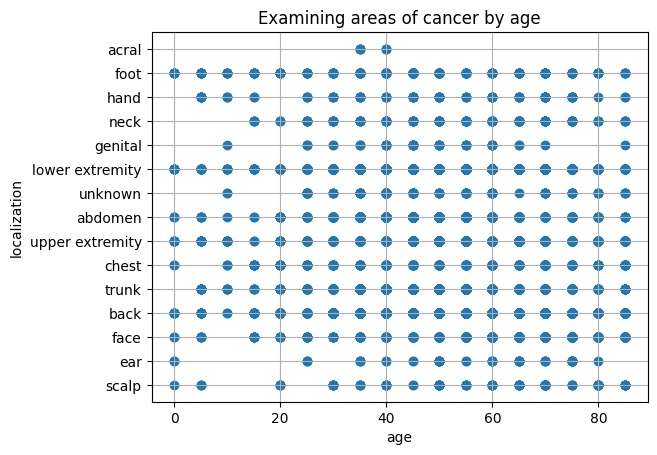

In [131]:
plt.title('Examining areas of cancer by age')
plt.scatter(df2['age'],df2['localization'])
plt.ylabel('localization')
plt.xlabel('age')
plt.grid()
plt.show()

### Dot plot analysis of the relationship between age and skin cancer locations

The presented dot chart shows the relationship between the age of the patients and the different locations of skin cancer. Here, the horizontal axis shows the age of the patients and the vertical axis shows the different locations of the cancer.

### Key observations:

1. **Uniform distribution in all ages:**
 - The points show that skin cancer is spread in all places among all ages. This shows that the locations of skin cancer do not change with age and are almost uniformly distributed at all ages.

2. **higher density in middle age:**
 - It seems that there is the highest concentration of points in the middle age (30 to 50 years). This can indicate an increased risk of skin cancer at this age.

3. **Variety of cancer sites:**
 - Skin cancer occurs in different parts of the body, including different parts such as: foot, hand, neck, genital area, lower extremity, abdomen, Upper extremities, chest, back, face, ear, and scalp.

4. **Existence of uncertain data:**
 - In the "unknown" category, there are points that indicate uncertain data about the location of cancer. This data may require further investigation or data cleaning.

5. **Check more details:**
 - To investigate in more detail, more detailed distributions of each cancer site by age can be provided to see more specific patterns.

### Conclusion:
This diagram shows that skin cancer is scattered in different parts of the body at all ages, and the highest concentration is observed in middle-aged people. For a more detailed analysis, it is necessary to examine more data and possibly use additional charts such as box plots or histogram charts for each of the cancer sites.

In [132]:
df3['age']=df3['age'].astype(str)

In [133]:
df3.describe()

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,9958,9958,9958,9958,9958,9958,9958
unique,7418,9958,7,4,18,3,15
top,HAM_0000835,ISIC_0029713,nv,histo,45,male,back
freq,6,1,6660,5332,1299,5400,2192


This table shows a summary of the information related to your skin lesion dataset. In this table, statistical descriptions are provided for each column (feature). Let's analyze each column separately:

### Analysis of columns

1. **lesion_id** (lesion ID):
 - **count**: 9958 - The total number of scraps in the dataset.
 - **unique**: 7418 - Number of unique scraps. This indicates that some lesion identifiers are duplicated.
 - **top**: HAM_0001863 - The most common lesion ID.
 - **freq**: 6 - This lesion ID is repeated 6 times in the dataset.

2. **image_id** (image ID):
 - **count**: 9958 - the total number of images in the dataset.
 - **unique**: 9958 - Number of unique images. This indicates that each image in the dataset is unique.
 - **top**: ISIC_0025253 - the most common image identifier (repeated only once because the number of ones equals the total number).
 - **freq**: 1 - This image ID exists only once in the dataset.

3. **dx** (diagnosis):
 - **count**: 9958 - Total number of detections.
 - **unique**: 7 - Number of unique detections. This shows that there are 7 different detection types in your dataset.
 - **top**: nv - the most common type of diagnosis (Nevus).
 - **freq**: 6660 - This type of detection is repeated 6660 times in the dataset.

4. **dx_type** (diagnosis type):
 - **count**: 9958 - total number of detection types.
 - **unique**: 4 - Number of unique detection types. This shows that there are 4 different detection types in the dataset.
 - **top**: histo - the most common type of diagnosis (Histopathology).
 - **freq**: 5332 - This type of detection is repeated 5332 times in the dataset.

5. **age** (age):
 - **count**: 9958 - Total number of age records.
 - **unique**: 18 - Number of unique ages. This shows that there are 18 different age values ​​in your dataset.
 - **top**: 45 - the most common age.
 - **freq**: 1299 - This age is repeated 1299 times in the dataset.

6. **sex** (gender):
 - **count**: 9958 - Total number of gender records.
 - **unique**: 3 - Number of unique genders. This shows that there are 3 different gender types (male, female, and unknown) in your dataset.
 - **top**: male - the most common gender.
 - **freq**: 5400 - This gender is repeated 5400 times in the dataset.

7. **localization** (location of the lesion):
 - **count**: 9958 - total number of lesion location records.
 - **unique**: 15 - Number of unique lesion locations. This shows that there are 15 different waste locations in your dataset.
 - **top**: back - the most common location of the lesion.
 - **freq**: 2192 - This lesion location is repeated 2192 times in the dataset.

### important points:
- Most of the diagnoses are related to ``nv'' (Nevus) type.
- The most common type of diagnosis is ``histo'' (Histopathology).
- The largest number of lesions has been observed in the ``back'' region.
- The highest number of gender records are related to men.
- The highest number of ages is 45 years old.

These analyzes can help you better understand the dataset and create more accurate predictive models. Also, additional analyzes and graphical plots may be needed to gain a deeper understanding of the relationships between features.

In [134]:
df4=df.copy()

In [135]:
df4['age']=df4['age'].astype(str)

In [136]:
#missing value
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [137]:
len(df4.index)

10015

In [138]:
df2.count()[0]

C:\Users\haide\AppData\Local\Temp\ipykernel_9160\185187589.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2.count()[0]


np.int64(9958)

In [139]:
df4['age'].value_counts()[:3]

age
45.0    1299
50.0    1187
55.0    1009
Name: count, dtype: int64

In [140]:
df4['localization'].value_counts()[:5]

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
Name: count, dtype: int64

**result:**
Based on the information that can be obtained from the above data, it is possible to get all skin cancers from the age of 35 to 40 years, and the highest number of patients are between 40 and 55 years old and most of the patients are male and Back, lower extremity, trunk, upper extremity, abdomen are the most affected areas.

**Note:** This information is without considering missing values ​​and unknown feature

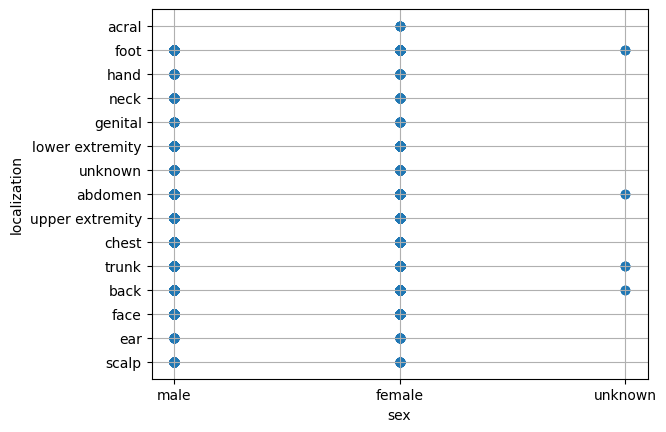

In [141]:
plt.grid()
plt.scatter(df2['sex'],df2['localization'])
plt.ylabel('localization')
plt.xlabel('sex')
plt.show()

This image shows a scatter plot of the distribution of skin lesions in different parts of the body (localization) according to sex. Let's analyze this chart:

### Chart analysis

1. **horizontal axis (X-axis)**: indicates sex, which includes three categories:
 - male
 - female
 - unknown

2. **vertical axis (Y-axis)**: indicates the location of skin lesions (localization), which includes different places in the body such as:
 - acral
 - foot
 - hand
 - neck
 - genitalia
 - lower extremity
 - upper extremity
 - chest
 - trunk
 - back
 - face
 - ear
 - scalp
 - unknown

3. **Blue dots**: Each dot represents the number of lesions in a specific location of the body for a specific gender.

### Important Notes

1. **Gender Distribution**:
 - All three genders (male, female, unknown) are scattered in all places of the body.
 - In some places, the number of lesions in "unknown" gender is more or less than "male" and "female".

2. **Spatial distribution of waste**:
 - Body locations include various points such as extremities, trunk, back, face, etc.
 - Different parts of the body are evenly distributed in different genders.

In [142]:
df8 = df2[df2['localization'] != 'unknown']
df8

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80,male,face


In [143]:
for i in range(len(df8)):
    if df8.iloc[i]['sex'] == 'unknown':
        df8.drop(df8.index[i])

In [144]:
df9=df8.copy()

In [145]:
df9.drop(df9[df9['sex'] == 'unknown'].index, inplace=True)

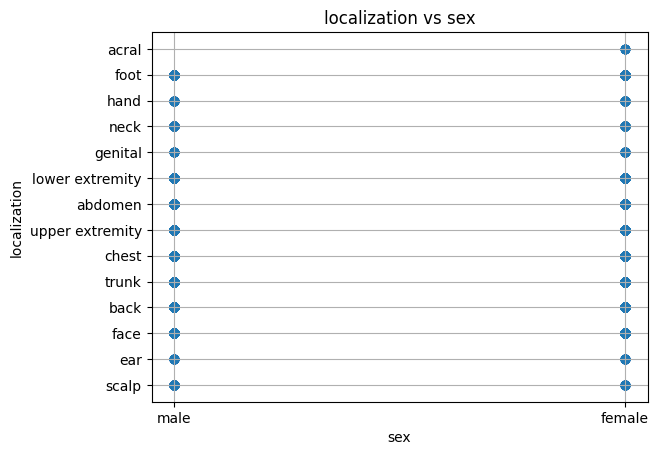

In [146]:
plt.grid()
plt.title('localization vs sex')
plt.scatter(df9['sex'],df9['localization'])
plt.ylabel('localization')
plt.xlabel('sex')
# plt.savefig('sexloc.png')
plt.show()

This image shows a scatter plot of the distribution of skin lesions in different parts of the body (localization) according to sex. Let's analyze this chart:

### Chart analysis

1. **Horizontal axis (X-axis)**: It shows sex, which includes two categories:
 - male
 - female


2. **vertical axis (Y-axis)**: indicates the location of skin lesions (localization), which includes different places in the body such as:
 - acral
 - foot
 - hand
 - neck
 - genitalia
 - lower extremity
 - upper extremity
 - chest
 - trunk
 - back
 - face
 - ear
 - scalp


3. **Blue dots**: Each dot represents the number of lesions in a specific location of the body for a specific gender.

### Important Notes

1. **Gender Distribution**:
 - Both genders (male, female) are scattered in all parts of the body.


2. **Spatial distribution of waste**:
 - Body locations include various points such as extremities, trunk, back, face, etc.
 - Different parts of the body are evenly distributed in different genders.

In [147]:
print(f'''
The number of male patifnts : {df9['sex'].value_counts()[0]}
The number of female patifnts : {df9['sex'].value_counts()[1]}
''')


The number of male patifnts : 5308
The number of female patifnts : 4453



C:\Users\haide\AppData\Local\Temp\ipykernel_9160\3411295900.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  The number of male patifnts : {df9['sex'].value_counts()[0]}
C:\Users\haide\AppData\Local\Temp\ipykernel_9160\3411295900.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  The number of female patifnts : {df9['sex'].value_counts()[1]}


**result** : Men get cancer more than women, the point is that men are only affected by the arcal area, while women are not affected by this area.

In [148]:
df9['lesion_id'].value_counts()[:4]

lesion_id
HAM_0003789    6
HAM_0000835    6
HAM_0001863    6
HAM_0005263    6
Name: count, dtype: int64

In [149]:
df10=df9.copy()

In [150]:
df10['age']=df10['age'].astype(str)

In [151]:
name_loc=[]
for i in df10['localization']: 
    if i not in name_loc :
        name_loc.append(i)

In [152]:
d=[]
c=[]
for i in df10['sex']:
    if i == 'male':
        d.append(1)
    elif i == 'female':
        d.append(0)
for i in df10['sex']:
    if i == 'female':
        c.append(1)
    elif i == 'male':
        c.append(0)    

In [153]:
df11=df10.copy()

In [154]:
df11['male']=d
df11['female']=c

In [155]:
male=0
for i in d:
    male+=i

In [156]:
female=0
for i in c:
    female+=i

In [157]:
name_df=['Male','Female']

In [158]:
df_gen=[male,female]

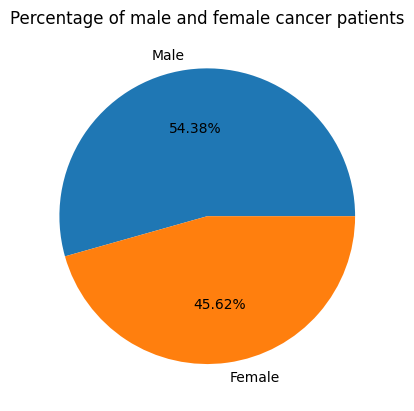

In [159]:
gender = np.array(df_gen)
mylabels = name_df

plt.title('Percentage of male and female cancer patients')
plt.pie(gender, labels = mylabels,autopct='%.2f%%')
plt.show() 

### Analyzing the percentage of cancer patients by gender
The diagram shows that:

- 54.38% of cancer patients in these data are men.
- 45.62% of cancer patients in these data are women.
total resulting:

Based on the data presented in this graph, it can be said that in this statistical sample, the prevalence of cancer among men is slightly higher than among women. In other words, out of every 100 people with cancer in this sample, about 54 are men and 45 are women.

**important things:**

- Data limitations: This chart only refers to a specific sample and cannot be generalized and considered as representative of the entire cancer population.

- Effective factors: Several factors influence the prevalence of cancer in men and women, including genetic factors, lifestyle, environment and type of cancer.

- Importance of more studies: To better understand gender differences in cancer prevalence, more extensive and detailed studies are needed.

In [160]:
df_genarat=sum(df_gen)
df_percentages=[(i/df_genarat)*100 for i in df_gen]

In [161]:
print(name_loc)

['scalp', 'ear', 'face', 'back', 'trunk', 'chest', 'upper extremity', 'abdomen', 'lower extremity', 'genital', 'neck', 'hand', 'foot', 'acral']


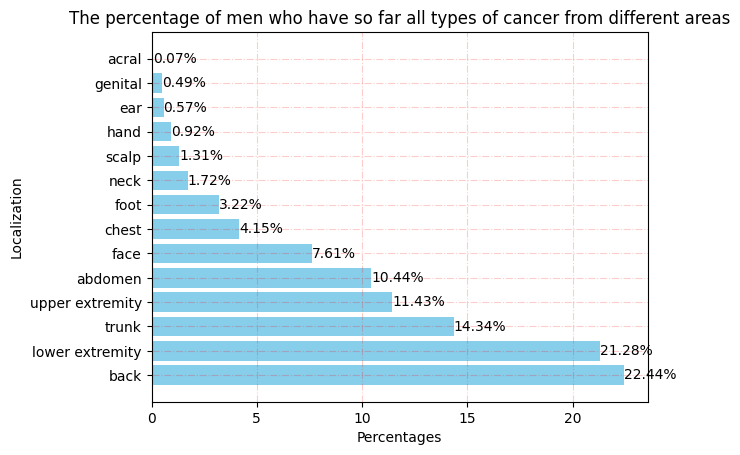

In [162]:
com_counts = df11['localization'].value_counts()

# Calculate percentages
total_male_cases = com_counts.sum()
percentages = (com_counts / total_male_cases) * 100

# Plotting

plt.barh(com_counts.index, percentages, color='skyblue')
plt.title('The percentage of men who have so far all types of cancer from different areas')
plt.grid(color='red', linestyle='-.', linewidth=0.8, alpha=0.2)
for i, percent in enumerate(percentages):
    plt.text(percent, i, f'{percent:.2f}%', ha='left', va='center')
plt.xlabel('Percentages')
plt.ylabel('Localization')
plt.savefig('perslocman.png')
plt.show()

These data show the distribution of skin cancer in different areas of the body. Here is a detailed analysis of this distribution:

### Analysis of skin cancer incidence distribution data:

1. **Back**:
 - **Number of items**: 2190
 - **total percentage**: about 22.44%
 - **Explanation**: This area has the highest number of skin cancer cases. This can be due to more exposure to the sun and repeated damage to the skin.

2. **Lower extremities**:
 - **Number of cases**: 2077
 - **total percentage**: about 21.28%
 - **Explanation**: The second area is in terms of the number of cases. Probably due to more exposure to mechanical damage and sunlight.

3. **Body (Trunk)**:
 - **Number of items**: 1400
 - **total percentage**: about 14.34%
 - **Explanation**: The third area in terms of incidence of skin cancer. This section includes large areas of the body, which can be the reason for this high number of cases.

4. **Upper extremities**:
 - **Number of items**: 1116
 - **total percentage**: about 11.43%
 - **Explanation**: This area includes arms and hands that are frequently exposed to sunlight and environmental factors.

5. **Abdomen**:
 - **Number of cases**: 1019
 - **total percentage**: about 10.44%
 - **Explanation**: This area also has significant cases of skin cancer due to its large size and contact with various environmental factors.

6. **Face**:
 - **Number of items**: 743
 - **total percentage**: about 7.61%
 - **Explanation**: The face is also frequently exposed to sunlight and environmental damage.

7. **Chest**:
 - **Number of items**: 405
 - **total percentage**: about 4.15%
 - **Explanation**: This area may have fewer cases due to less exposure to sunlight than other areas.

8. **Foot**:
 - **Number of items**: 314
 - **total percentage**: about 3.22%
 - **Explanation**: This area also has fewer cases due to less exposure to sunlight.

9. **Neck**:
 - **Number of items**: 168
 - **total percentage**: about 1.72%
 - **Explanation**: This area has fewer cases due to more coverage and less exposure to sunlight.

10. **Scalp**:
 - **Number of items**: 128
 - **total percentage**: about 1.31%
 - **Explanation**: Hair covering can play a protective role against sunlight.

11. **Hand**:
 - **Number of items**: 90
 - **total percentage**: about 0.92%
 - **Explanation**: An area that has fewer cases due to less exposure to sunlight and mechanical damage.

12. **Ear**:
 - **Number of items**: 56
 - **total percentage**: about 0.57%
 - **Explanation**: Ears also have fewer cases because they are covered with hair and are less exposed to sunlight.

13. **Genital area**:
 - **Number of items**: 48
 - **total percentage**: about 0.49%
 - **Explanation**: This area has very few cases due to being more covered and less exposed to sunlight.

14. Acral:
 - **Number of items**: 7
 - **total percentage**: less than 0.7%
 - **Explanation**: This area has the lowest number of cases due to its rare exposure to environmental damage and sunlight.

### Conclusion:
These data show that areas more exposed to sunlight and mechanical damage are more prone to skin cancer. Areas that are more covered and less exposed to sunlight show fewer cases of skin cancer. This information can be used to develop more effective prevention and treatment strategies.

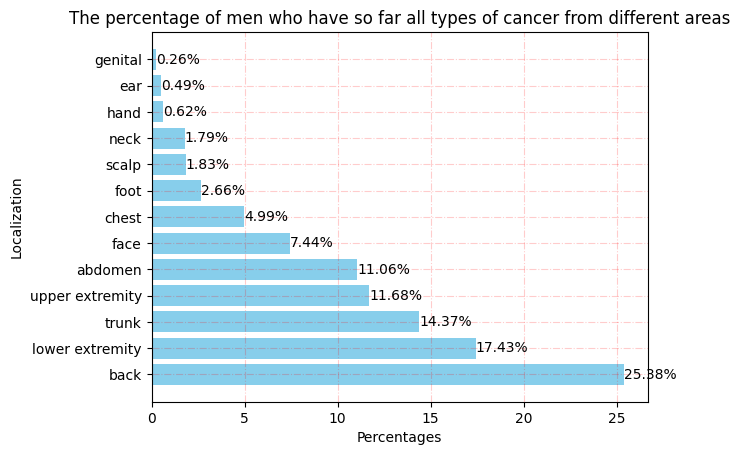

In [163]:
male_counts = df11[df11['sex'] == 'male']['localization'].value_counts()

# Calculate percentages
total_male_cases = male_counts.sum()
percentages = (male_counts / total_male_cases) * 100

# Plotting

plt.barh(male_counts.index, percentages, color='skyblue')
plt.title('The percentage of men who have so far all types of cancer from different areas')
plt.grid(color='red', linestyle='-.', linewidth=0.8, alpha=0.2)
for i, percent in enumerate(percentages):
    plt.text(percent, i, f'{percent:.2f}%', ha='left', va='center')
plt.xlabel('Percentages')
plt.ylabel('Localization')
plt.savefig('perslocman.png')
plt.show()

### data analysis

Your data shows how skin cancer cases are distributed in different areas of the male body. The number of cases of skin cancer in different parts of the body is as follows:


### Analysis:

1. **Back**:
 - With 1347 cases and 25.38% of all cases, it has the highest number of skin cancer cases in men.

2. **Lower extremity**:
 - With 925 cases and 17.43% of all cases, the lower limb is in second place.

3. **Trunk**:
 - With 763 cases and 14.37% of the total cases, Taneh ranks third.

4. **Upper extremity**:
 - With 620 cases and 11.68% of all cases, the upper limb ranks fourth.

5. **Abdomen**:
 - With 587 cases and 11.06% of all cases, the abdomen is in fifth place.

6. **Face**:
 - With 395 cases and 7.44% of all cases, the face ranks sixth.

7. **Chest**:
 - With 265 cases and 4.99% of all cases, Sine ranks seventh.

8. **Foot**:
 - With 141 cases and 2.66% of all cases, Pa is in eighth place.

9. **Scalp**:
 - With 97 cases and 1.83% of all cases, the scalp is in ninth place.

10. **Neck**:
 - With 95 cases and 1.79% of all cases, the neck is in the 10th place.

11. **Hand**:
 - With 33 cases and 0.62% of all cases, the hand is in the 11th place.

12. **Ear**:
 - With 26 cases and 0.49% of all cases, Gosh is in the twelfth place.

13. Genital area:
 - With 14 cases and 0.26% of all cases, the genital region has the lowest number of cases.

### Conclusion:

The most cases of skin cancer in men are related to the back and lower limbs. These results can be due to more exposure to sunlight in these areas. Areas such as the hands, ears, and genital area have the lowest number of cases, which could be because these areas are less exposed to sunlight.

This analysis can be useful for prevention and awareness programs about skin cancer in men.

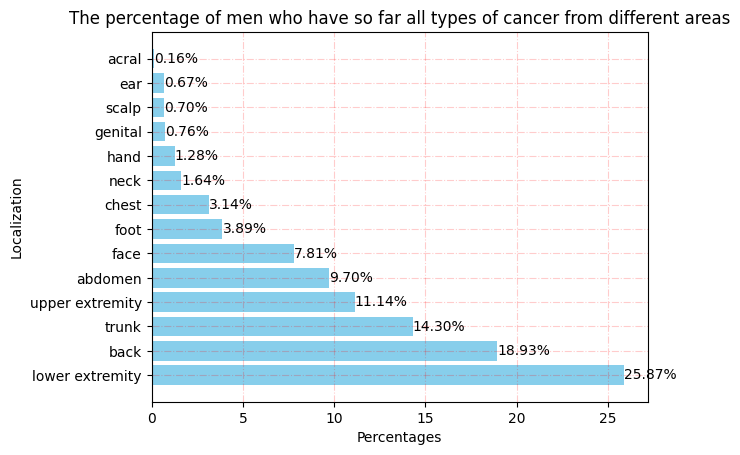

In [164]:
female_counts = df11[df11['sex'] == 'female']['localization'].value_counts()

# Calculate percentages
total_female_cases = female_counts.sum()
percentages = (female_counts / total_female_cases) * 100

# Plotting

plt.barh(female_counts.index, percentages, color='skyblue')
plt.title('The percentage of men who have so far all types of cancer from different areas')
plt.grid(color='red', linestyle='-.', linewidth=0.8, alpha=0.2)
for i, percent in enumerate(percentages):
    plt.text(percent, i, f'{percent:.2f}%', ha='left', va='center')
plt.xlabel('Percentages')
plt.ylabel('Localization')
plt.savefig('perslocman.png')
plt.show()

These data show the distribution of skin cancer in different areas of the body. If we want to analyze these data, we can pay attention to the following points:

1. **Highest percentage of incidence**: Different areas of the body based on the number of skin cancer cases are as follows:
 - **Lower extremities**: 1152 cases
 - **Back**: 843 items
 - **Trunk**: 637 items
 - **Upper extremity**: 496 cases
 - **Abdomen**: 432 cases
 - **Face**: 348 cases
 - **Foot**: 173 items

2. **The lowest percentage of incidence**: The areas that are less affected than other areas include:
 - **The most underpopulated areas**:
 - **Scalp**: 31 cases
 - **Ear**: 30 items
 - **Genital area**: 34 cases
 - **Lowest areas**: **Acral**: 7 cases

3. **Notable points**:
 - The areas with the highest number of cases are mainly the larger and more sun-exposed areas such as the back and lower limbs.
 - Areas such as the ears and genital area, which are usually less exposed to direct sunlight, have a lower number of cases.

These data can help to better understand skin cancer incidence patterns and create effective prevention and treatment strategies. If you need more analysis or information, I'd be happy to help!

**result**: According to the above graphs, the most cases of both women and men have cancer from the scale, men from the back and women from the lower extremity.

In [165]:
name_age = [str(i) for i in df11[df11['sex']=='female']['age'].value_counts()[:18].index]

In [166]:
age_df=[]
for i in range(18):
    age_df.append(df11[df11['sex']=='female']['age'].value_counts()[:18][i])  

C:\Users\haide\AppData\Local\Temp\ipykernel_9160\296722244.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_df.append(df11[df11['sex']=='female']['age'].value_counts()[:18][i])
C:\Users\haide\AppData\Local\Temp\ipykernel_9160\296722244.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_df.append(df11[df11['sex']=='female']['age'].value_counts()[:18][i])
C:\Users\haide\AppData\Local\Temp\ipykernel_9160\296722244.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

In [167]:
dfage=sum(age_df)
percent_age=[(i/dfage)*100 for i in age_df]

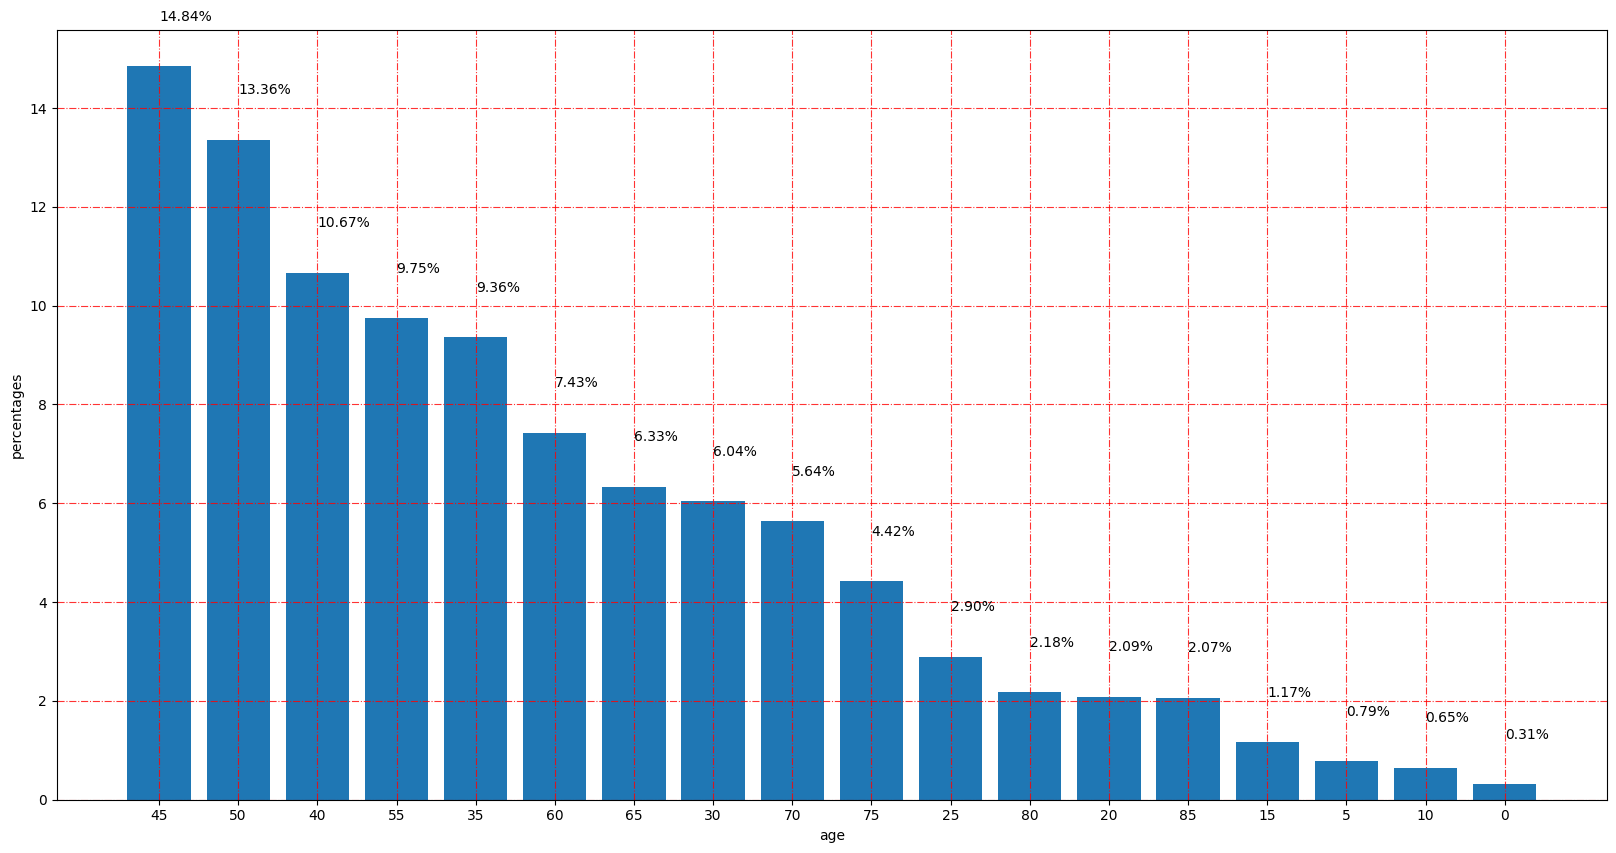

In [168]:
plt.figure(figsize=(20,10))
plt.bar(name_age,percent_age)
plt.grid(color ='red',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.8)
for i, percent in enumerate(percent_age):
    plt.text(i , percent+1, f'{percent:.2f}%', ha='left', va='center')
# plt.savefig('persagefemale.png')
plt.xlabel('age') 
plt.ylabel('percentages') 
plt.show()

In [169]:
name_age2 = [str(i) for i in df11[df11['sex']=='male']['age'].value_counts()[:18].index]

In [170]:
age_df2=[]
for i in range(18):
    age_df2.append(df11[df11['sex']=='male']['age'].value_counts()[:18][i]) 

C:\Users\haide\AppData\Local\Temp\ipykernel_9160\2460839441.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_df2.append(df11[df11['sex']=='male']['age'].value_counts()[:18][i])
C:\Users\haide\AppData\Local\Temp\ipykernel_9160\2460839441.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_df2.append(df11[df11['sex']=='male']['age'].value_counts()[:18][i])
C:\Users\haide\AppData\Local\Temp\ipykernel_9160\2460839441.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

In [171]:
dfage2=sum(age_df2)
percent_age2=[(i/dfage2)*100 for i in age_df2]

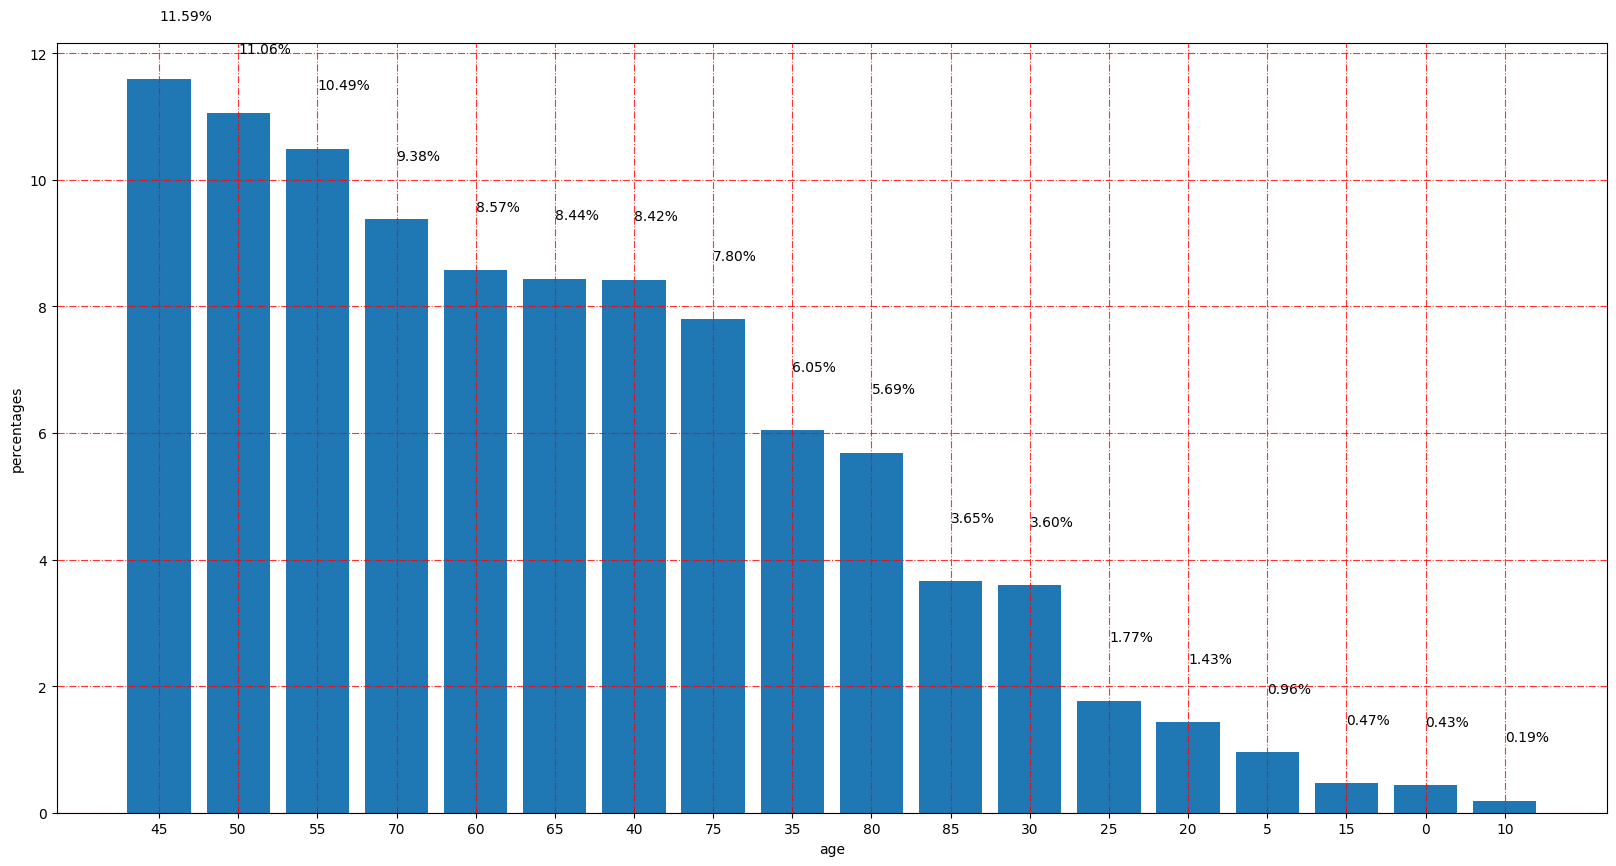

In [172]:
plt.figure(figsize=(20,10))
plt.bar(name_age2,percent_age2)
plt.grid(color ='red',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.8)
for i, percent in enumerate(percent_age2):
    plt.text(i , percent+1, f'{percent:.2f}%', ha='left', va='center')
# plt.savefig('persagemale.png')
plt.xlabel('age') 
plt.ylabel('percentages') 
plt.show()

**result**:Both men and women have the highest age of 45 years and share the same age of 50 years and So we conclude that the possibility of getting skin cancer is more in old age

In [173]:
man_hist=df8[df8['sex']=='male']['age']
woman_hist=df8[df8['sex']=='female']['age']

In [174]:
n1=[df8['age'],man_hist,woman_hist]
n3=['Both ages','Male','Female']


In [175]:
def hist_seaborn(n1, n3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    
    for i in range(len(n1)):
        sns.histplot(n1[i], kde=True, color='purple', ax=axes[i])
        axes[i].set_xlabel(f'{n3[i]} Values')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Distribution of {n3[i]} Values')
    
    plt.tight_layout()
    plt.show()

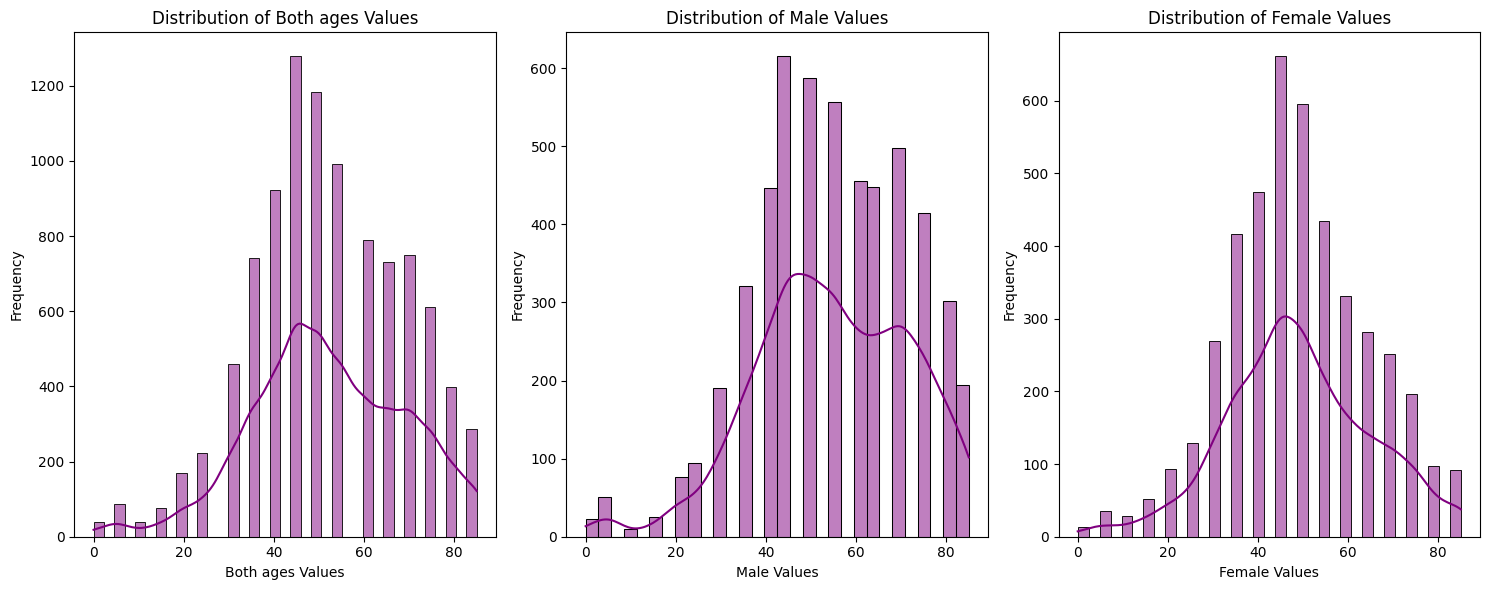

In [176]:
hist_seaborn(n1, n3)

### Distribution analysis of skin cancer patients

The image you posted contains three histograms of the distribution of skin cancer patients by age and gender. These charts show the age distribution of patients by gender.

#### First diagram: Distribution of Both ages Values
- This chart shows the age distribution of all patients (men and women).
- It can be seen that the largest number of patients are in the age range of 40 to 50 years.
- The distribution is in the form of a bell curve (Normal Distribution) with a peak in the middle age range.

#### Second diagram: Distribution of Male Values
- This graph shows the age distribution of male patients.
- The largest number of male patients are in the age range of 40 to 50 years.
- The distribution is similar to the general distribution of patients, but with a smaller number in older age groups.

#### The third diagram: Distribution of Female Values
- This graph shows the age distribution of female patients.
- The largest number of female patients are in the age range of 40 to 50 years.
- The distribution is similar to the general distribution of patients, but the number of patients in older age groups is slightly more than men.

### Checking the normality of distributions

To check the normality of distributions, statistical tests such as Shapiro-Wilk or Kolmogorov-Smirnov are usually used. However, based on the presented histogram charts, general conclusions can be drawn.

### Visual analysis of charts

#### First diagram: Distribution of Both Ages Values
- The distribution of the data is almost bell-shaped, which indicates the similarity to the normal distribution.
- The main peak is in the age range of 40-50 years and then a gradual decrease is observed on both sides of the peak.

#### Second diagram: Distribution of Male Values
- This graph also has a bell shape, which indicates a normal distribution.
- The peak is in the age range of 40-50 years and a gradual decrease similar to the first graph is observed on both sides of the peak.

#### The third diagram: Distribution of Female Values
- The distribution of the data is in the form of a bell, which shows the similarity to the normal distribution.
- The main peak is in the age range of 40-50 years and then a gradual decrease is observed on both sides of the peak.

### Visual conclusion
According to the shape of the graphs, it can be said that the data distribution looks approximately normal. To confirm this more precisely, statistical tests can be used.

### Code to check the normality of the distribution
We can check whether the distributions are normal using the Shapiro-Wilk test. Here is the sample code to do this:

### Conclusion:
1. **Age concentration of patients**: Most patients with skin cancer are in the middle age range (about 40 to 50 years old).
2. **Gender difference**: There is no significant difference between the age distribution of men and women, although the number of women in older ages is slightly more than men.
3. **Distribution shape**: All three distribution graphs have a bell shape, which indicates a normal distribution with an average age of about 40 to 50 years.

This analysis can be useful for designing targeted prevention and treatment programs for specific age groups and both sexes.

In [177]:
def plot_dx(value):
    
    value_counts = value.value_counts()
    keys = value_counts.index
    counts = value_counts.values
    
    plt.figure(figsize=(10, 6))
    plt.bar(keys, counts, color='purple')
    
    plt.xlabel('Number of Rooms')
    plt.ylabel('Count')
    plt.title(f'Count of Rooms in dx columns')
    
    for i in range(len(keys)):
        plt.text(keys[i], counts[i] + 1, str(counts[i]), ha='center', va='bottom')
    
    plt.show()

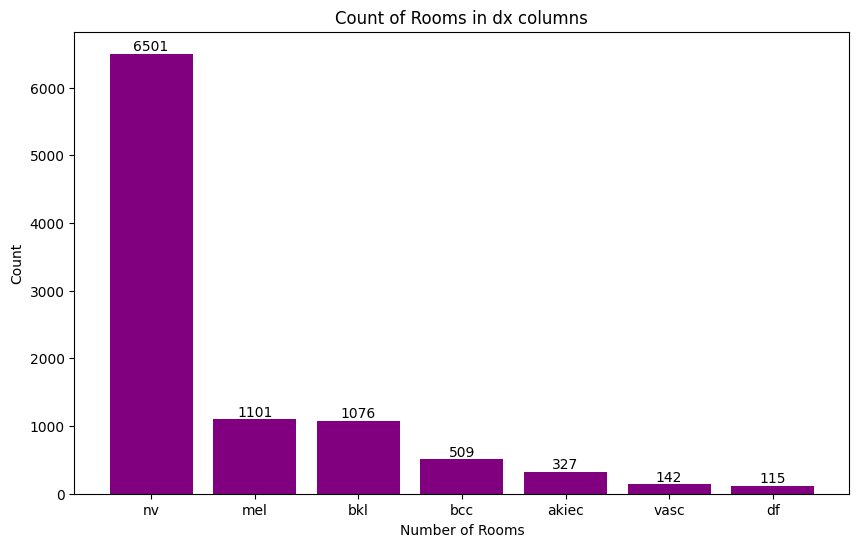

In [178]:
plot_dx(df8['dx'])

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different detection cases (dx) in one column. Diagnostic categories include the following:

1. **nv (6501 items)**
2. **mel (1101 items)**
3. **bkl (1076 items)**
4. **bcc (509 items)**
5. **akiec (327 items)**
6. **vasc (142 items)**
7. **df (115 items)**

#### Analysis of categories:

1. **nv (6501 items)**
 - This category has the largest number of items. "nv" alone appears to account for more than 60% of all cases. This could indicate that this type of diagnosis is much more common than the other categories.

2. **mel (1101 items) and bkl (1076 items)**
 - These two categories have almost the same number and after "nv" they have the most number of cases.

3. **bcc (509 items)**
 - This category is far less than "mel" and "bkl", but still has a significant number.

4. **akiec (327 items)**
 - The number of cases in this category is less but still significant.

5. **vasc (142 items) and df (115 items)**
 - These two categories have the lowest number of cases and seem to be less common than the other categories.

### total resulting:

- **Focus on "nv":** Since "nv" has the highest number of cases, this type of detection should probably be investigated and studied more.
- **Variety of diagnoses:** There is a variation in the number of cases between the categories, which can indicate the unequal distribution of the types of diagnoses in the studied samples.
- **Commonness of "mel" and "bkl":** After "nv", "mel" and "bkl" categories also need special attention.

For more detailed analysis and providing treatment or research suggestions, it is necessary to consider more data such as demographic information of patients, possible causes and results of treatments.

In [179]:
def plot_dx_type(value):
    
    value_counts = value.value_counts()
    keys = value_counts.index
    counts = value_counts.values
    
    plt.figure(figsize=(10, 6))
    plt.bar(keys, counts, color='purple')
    
    plt.xlabel('Number of Rooms')
    plt.ylabel('Count')
    plt.title(f'Count of Rooms in dx_type columns')
    
    for i in range(len(keys)):
        plt.text(keys[i], counts[i] + 1, str(counts[i]), ha='center', va='bottom')
    
    plt.show()

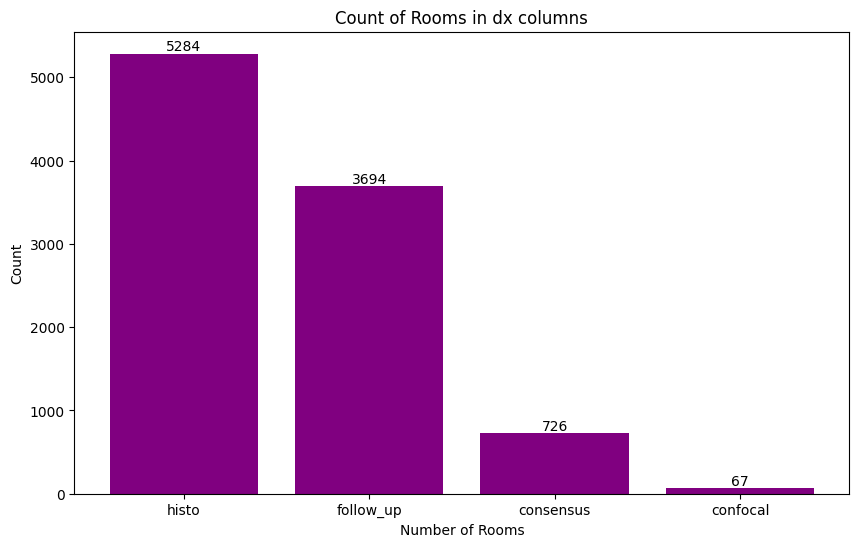

In [180]:
plot_dx(df8['dx_type'])

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different items in the diagnosis (dx) columns. Diagnostic categories include the following:

1. **histo (5284 items)**
2. **follow_up (3694 cases)**
3. **consensus (726 items)**
4. **confocal (67 cases)**

#### Analysis of categories:

1. **histo (5284 items)**
 - This category has the largest number of cases and indicates that most of the diagnoses are based on histopathological. This method of diagnosis is the most accurate and the most common method for many types of cancer and other skin diseases.

2. **follow_up (3694 items)**
 - This category also includes a large number of cases and shows that many patients have visited the doctor to follow up and check their condition. Regular follow-up is critical to monitor disease progression and the effectiveness of treatments.

3. **consensus (726 items)**
 - The number of cases in this category is less but still significant. These cases probably required joint diagnosis by several specialist doctors, which indicates the complexity of some diagnostic cases.

4. **confocal (67 cases)**
 - This category has the least number of items. Confocal microscopy is an advanced diagnostic technique that is rarely used and is usually used for special and more complex cases.

### total resulting:

- **Focus on "histo":** Since "histo" has the largest number of cases, this type of diagnosis should probably be investigated and studied more. This shows that histopathological examination is still the gold standard for diagnosing many skin diseases.
- **Patients' follow-up:** The large number of follow-up cases shows that patient follow-up is an important part of the treatment process. These follow-ups can be very important to evaluate the effectiveness of treatments and control the progress of diseases.
- **Joint and specialized diagnosis:** The "consensus" category indicates that in some cases there is a need for a joint diagnosis by several specialist doctors, which can be useful for complex and ambiguous cases.
- **Limited use of confocal microscopy:** The small number of "confocal" cases can indicate the limited use of this technique, which is usually used for specific and more complex cases.

### Offers:
- **Attention to new diagnostic methods:** Even though histopathological examination is the main method of diagnosis, the review and study of new methods such as confocal microscopy can help to improve diagnostic processes.
- **Regular follow-up of patients:** Emphasis on regular follow-up of patients to better control diseases and evaluate the effectiveness of treatments.
- **Increasing expertise in diagnosis:** The use of joint diagnoses by multispecialty teams for complex cases can help improve the accuracy of diagnoses.

In [181]:
man_dx = df2[df2['sex']=='male']['dx']

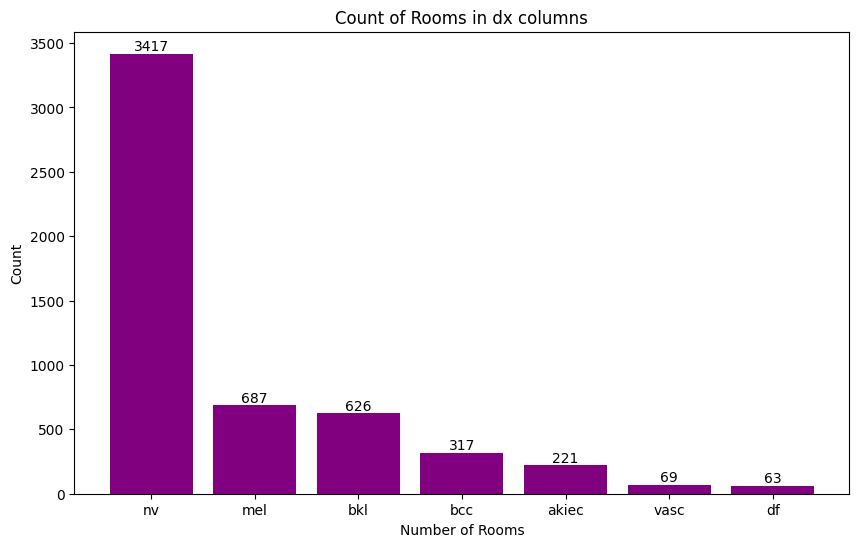

In [182]:
plot_dx(man_dx)

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different detection cases (dx) in one column. Diagnostic categories include the following:

1. **nv (3417 items)**
2. **mel (687 items)**
3. **bkl (626 items)**
4. **bcc (317 items)**
5. **akiec (221 items)**
6. **vasc (69 items)**
7. **df (63 items)**

#### Analysis of categories:

1. **nv (3417 items)**
 - This category has the largest number of items. "nv" alone appears to account for more than 60% of all cases. This could indicate that this type of diagnosis is much more common than the other categories.

2. **mel (687 items) **
 - These  categorie have almost the same number and after "nv" they have the most number of cases.

3. **bkl (626 items)) **
 -  - This category is far less than "mel", but still has a significant number.

4. **bcc (317 items)**
 - This category is far less than "mel" and "bkl", but still has a significant number.

5. **akiec (221 items)**
 - The number of cases in this category is less but still significant.

6. **vasc (69 items)**
 - This category has the least number of cases and seems to be less common than the other categories.
 
7. **df (63 items)**
 - This category has the least number of cases and seems to be less common than the other categories.

### total resulting:

- **Focus on "nv":** Since "nv" has the highest number of cases, this type of detection should probably be investigated and studied more.
- **Variety of diagnoses:** There is a variation in the number of cases between the categories, which can indicate the unequal distribution of the types of diagnoses in the studied samples.
- **Commonness of "mel" and "bkl":** After "nv", "mel" and "bkl" categories also need special attention.

For more detailed analysis and providing treatment or research suggestions, it is necessary to consider more data such as demographic information of patients, possible causes and results of treatments.

In [183]:
woman_dx=man_dx = df2[df2['sex']=='female']['dx']

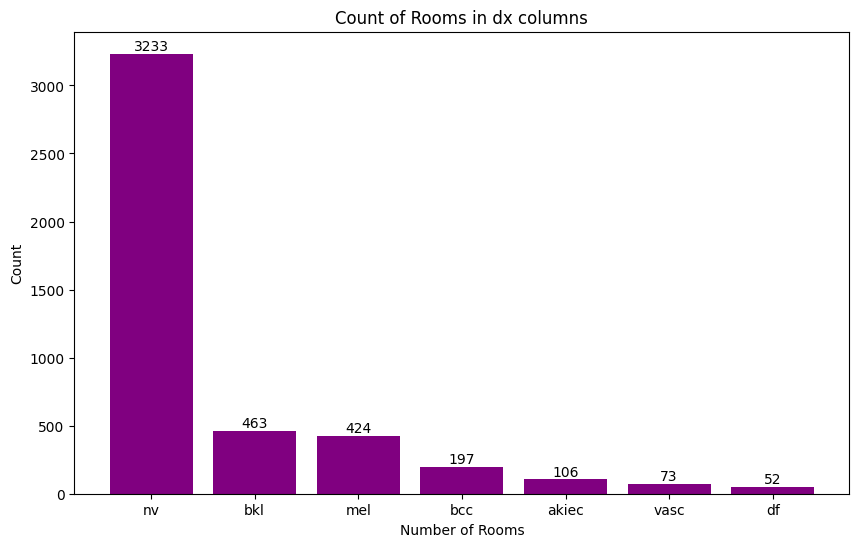

In [184]:
plot_dx(woman_dx)

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different detection cases (dx) in one column. Diagnostic categories include the following:

1. **nv (3233 items)**
2. **mel (463 items)**
3. **bkl (424 items)**
4. **bcc (197 items)**
5. **akiec (106 items)**
6. **vasc (73 items)**
7. **df (52 items)**

#### Analysis of categories:

1. **nv (3233 items)**
 - This category has the largest number of items. "nv" alone appears to account for more than 60% of all cases. This could indicate that this type of diagnosis is much more common than the other categories.

2. **mel (463 items) **
 - These  categorie have almost the same number and after "nv" they have the most number of cases.

3. **bkl (424 items)) **
 -  - This category is far less than "mel", but still has a significant number.

4. **bcc (197 items)**
 - This category is far less than "mel" and "bkl", but still has a significant number.

5. **akiec (106 items)**
 - The number of cases in this category is less but still significant.

6. **vasc (73 items)**
 - This category has the least number of cases and seems to be less common than the other categories.
 
7. **df (52 items)**
 - This category has the least number of cases and seems to be less common than the other categories.

### total resulting:

- **Focus on "nv":** Since "nv" has the highest number of cases, this type of detection should probably be investigated and studied more.
- **Variety of diagnoses:** There is a variation in the number of cases between the categories, which can indicate the unequal distribution of the types of diagnoses in the studied samples.
- **Commonness of "mel" and "bkl":** After "nv", "mel" and "bkl" categories also need special attention.

For more detailed analysis and providing treatment or research suggestions, it is necessary to consider more data such as demographic information of patients, possible causes and results of treatments.

In [185]:
man_type = df2[df2['sex']=='male']['dx_type']

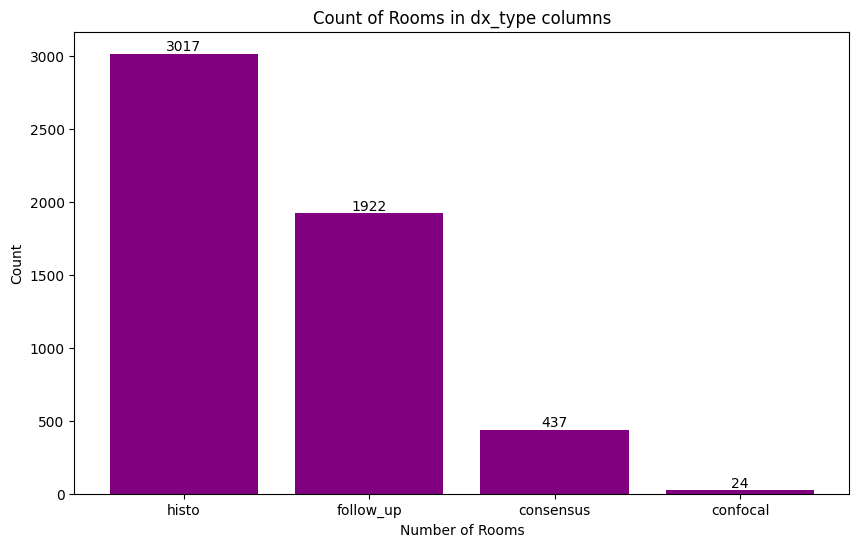

In [186]:
plot_dx_type(man_type)

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different items in the diagnosis (dx) columns. Diagnostic categories include the following:

1. **histo (3017 items)**
2. **follow_up (1922 cases)**
3. **consensus (437 items)**
4. **confocal (24 cases)**

#### Analysis of categories:

1. **histo (3017 items)**
 - This category has the largest number of cases and indicates that most of the diagnoses are based on histopathological. This method of diagnosis is the most accurate and the most common method for many types of cancer and other skin diseases.

2. **follow_up (1922 items)**
 - This category also includes a large number of cases and shows that many patients have visited the doctor to follow up and check their condition. Regular follow-up is critical to monitor disease progression and the effectiveness of treatments.

3. **consensus (437 items)**
 - The number of cases in this category is less but still significant. These cases probably required joint diagnosis by several specialist doctors, which indicates the complexity of some diagnostic cases.

4. **confocal (24 cases)**
 - This category has the least number of items. Confocal microscopy is an advanced diagnostic technique that is rarely used and is usually used for special and more complex cases.

### total resulting:

- **Focus on "histo":** Since "histo" has the largest number of cases, this type of diagnosis should probably be investigated and studied more. This shows that histopathological examination is still the gold standard for diagnosing many skin diseases.
- **Patients' follow-up:** The large number of follow-up cases shows that patient follow-up is an important part of the treatment process. These follow-ups can be very important to evaluate the effectiveness of treatments and control the progress of diseases.
- **Joint and specialized diagnosis:** The "consensus" category indicates that in some cases there is a need for a joint diagnosis by several specialist doctors, which can be useful for complex and ambiguous cases.
- **Limited use of confocal microscopy:** The small number of "confocal" cases can indicate the limited use of this technique, which is usually used for specific and more complex cases.

### Offers:
- **Attention to new diagnostic methods:** Even though histopathological examination is the main method of diagnosis, the review and study of new methods such as confocal microscopy can help to improve diagnostic processes.
- **Regular follow-up of patients:** Emphasis on regular follow-up of patients to better control diseases and evaluate the effectiveness of treatments.
- **Increasing expertise in diagnosis:** The use of joint diagnoses by multispecialty teams for complex cases can help improve the accuracy of diagnoses.

In [187]:
woman_type = df2[df2['sex']=='female']['dx_type']

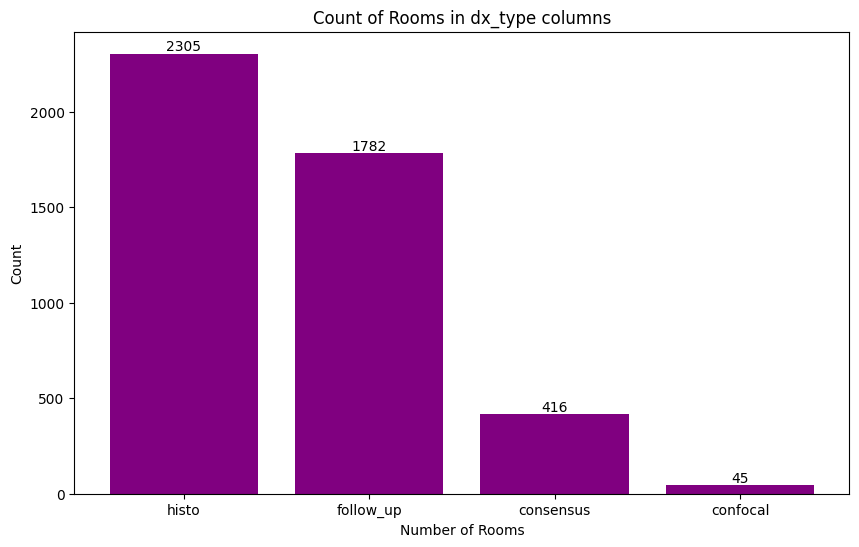

In [188]:
plot_dx_type(woman_type)

### Analysis of the chart "Count of Rooms in dx columns"

The graph shown displays the number of different items in the diagnosis (dx) columns. Diagnostic categories include the following:

1. **histo (2305 items)**
2. **follow_up (1708 cases)**
3. **consensus (416 items)**
4. **confocal (45 cases)**

#### Analysis of categories:

1. **histo (2305 items)**
 - This category has the largest number of cases and indicates that most of the diagnoses are based on histopathological. This method of diagnosis is the most accurate and the most common method for many types of cancer and other skin diseases.

2. **follow_up (1708 items)**
 - This category also includes a large number of cases and shows that many patients have visited the doctor to follow up and check their condition. Regular follow-up is critical to monitor disease progression and the effectiveness of treatments.

3. **consensus (416 items)**
 - The number of cases in this category is less but still significant. These cases probably required joint diagnosis by several specialist doctors, which indicates the complexity of some diagnostic cases.

4. **confocal (45 cases)**
 - This category has the least number of items. Confocal microscopy is an advanced diagnostic technique that is rarely used and is usually used for special and more complex cases.

### total resulting:

- **Focus on "histo":** Since "histo" has the largest number of cases, this type of diagnosis should probably be investigated and studied more. This shows that histopathological examination is still the gold standard for diagnosing many skin diseases.
- **Patients' follow-up:** The large number of follow-up cases shows that patient follow-up is an important part of the treatment process. These follow-ups can be very important to evaluate the effectiveness of treatments and control the progress of diseases.
- **Joint and specialized diagnosis:** The "consensus" category indicates that in some cases there is a need for a joint diagnosis by several specialist doctors, which can be useful for complex and ambiguous cases.
- **Limited use of confocal microscopy:** The small number of "confocal" cases can indicate the limited use of this technique, which is usually used for specific and more complex cases.

### Offers:
- **Attention to new diagnostic methods:** Even though histopathological examination is the main method of diagnosis, the review and study of new methods such as confocal microscopy can help to improve diagnostic processes.
- **Regular follow-up of patients:** Emphasis on regular follow-up of patients to better control diseases and evaluate the effectiveness of treatments.
- **Increasing expertise in diagnosis:** The use of joint diagnoses by multispecialty teams for complex cases can help improve the accuracy of diagnoses.

<Figure size 1000x600 with 0 Axes>

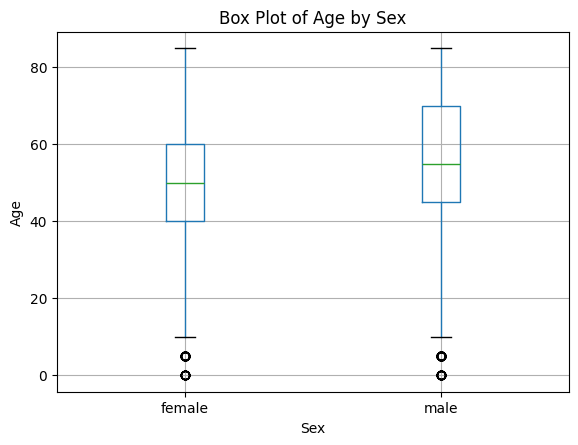

In [189]:
plt.figure(figsize=(10, 6))
df9.boxplot(column='age', by='sex')
plt.title('Box Plot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.suptitle('')  
plt.show()

This graph provides valuable information about the age distribution of people with skin cancer by gender.

### General interpretation:

- Age difference: In general, this graph shows that in this dataset, people with skin cancer in both sexes have a wide range of ages. However, it seems that the average age of affected people is almost the same in both sexes.
- Data dispersion: vertical lines (chairs) in the boxes show that the age dispersion is high in both male and female groups. This means that people with skin cancer are found in both sexes, both at young and old ages.
- Quartiles: the boxes show the first and third quartiles, where 50% of the data are between them. The length of the boxes shows us how much of the data is concentrated in a certain range of ages. In this graph, the box lengths are almost the same for both sexes, indicating that the age distribution in this range is similar for both sexes.
- Outliers: Black dots outside the boxes and seats show outliers. These points correspond to people whose age is significantly different from other people in their group. In this graph, there are several outliers in both sexes, indicating that some individuals developed skin cancer at ages much younger or older than the average age of their group.
Preliminary conclusion:

Based on this diagram, it can be concluded that:

- Age alone cannot be considered as a main determining factor for skin cancer, because people in a wide range of ages are affected by this disease.
- Other factors such as exposure to sunlight, family history, skin type, etc. also play an important role in skin cancer.
- The presence of outliers indicates that some unknown factors or other subgroup factors may play a role in skin cancer in some people.

<Figure size 1200x600 with 0 Axes>

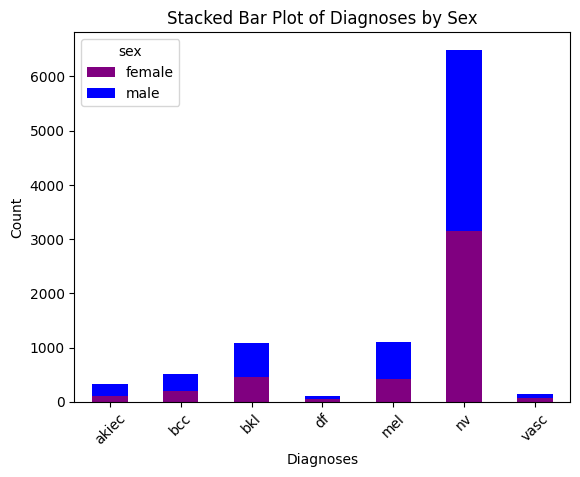

In [190]:
plt.figure(figsize=(12, 6))
pd.crosstab(df9['dx'], df9['sex']).plot(kind='bar', stacked=True, color=['purple', 'blue'])
plt.title('Stacked Bar Plot of Diagnoses by Sex')
plt.xlabel('Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Bar chart analysis of diagnoses by gender

This chart visually compares the number of different skin cancer diagnoses among women and men. Each column represents a specific type of diagnosis, and the height of each section of the column indicates the number of diagnoses in each gender (female or male).

### General interpretation of the diagram:

- **Differences between genders:** The graph shows that, in general, the number of skin cancer diagnoses is higher in men than in women. This difference is particularly evident in some types of diagnoses such as "nv" (probably referring to benign melanocytic lesions).
- **Distribution of diagnoses:** The distribution of diagnoses among different types of skin cancer is different between men and women. Some types of skin cancer, such as bcc (basal cell carcinoma) and bkl (benign brown spots), are more common in both sexes, while others, such as nv, are more common in men.
- **Types of diagnoses:** Without more information about the abbreviations used in the X-axis (Diagnoses), it is not possible to accurately comment on the different types of skin cancer. However, in general, "akiec" (actinic keratosis), "bcc" (basal cell carcinoma), "bkl" (benign brown macules), "mel" (melanoma), "nv" (benign melanocytic lesions) and "vasc" (vascular tumors) are common types of skin cancer.

<Figure size 2500x1000 with 0 Axes>

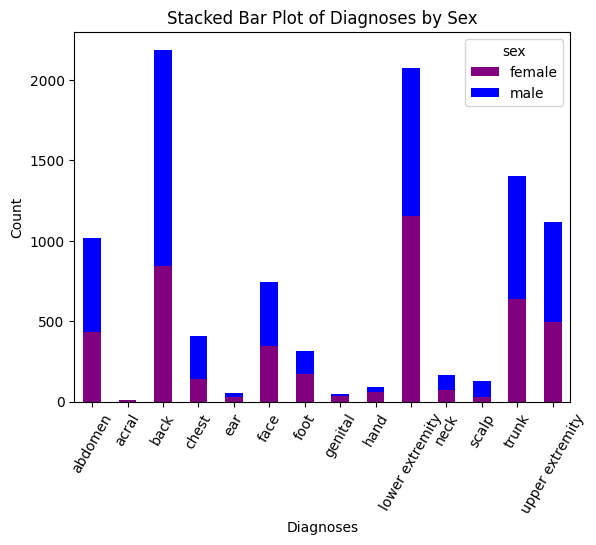

In [191]:
plt.figure(figsize=(25, 10))
pd.crosstab(df9['localization'], df9['sex']).plot(kind='bar', stacked=True, color=['purple', 'blue'])
plt.title('Stacked Bar Plot of Diagnoses by Sex')
plt.xlabel('Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

# Stacked bar chart analysis of cancer diagnoses by gender


This chart visually shows the number of different skin cancer diagnoses in different areas of the body, separately for women and men. Each column represents a specific region of the body, and the height of each column represents the number of diagnoses in that region, for each gender (male or female).

**General interpretation of the chart:**

- **Difference between genders:** The graph shows that, in general, the number of skin cancer diagnoses in different areas of the body is different between women and men. In some areas, such as "back", "hands", and "trunk", the number of diagnoses in men is significantly higher than in women.
- **Distribution of diagnoses:** The distribution of diagnoses in different areas of the body is different between men and women. For example, in the "face" area, the number of diagnoses in women is higher than in men, while in the "head" area, the difference is the opposite.
- **High-risk areas:** Areas such as "back", "hands", "trunk", "face" and "head" seem to be more susceptible to skin cancer.

**important things:**

- **Type of Cancer:** This graph only shows the number of diagnoses and does not provide information about the type of skin cancer in each area.
- **Effective factors:** The difference in the number of diagnoses between different areas and genders may be related to various factors such as exposure to sunlight, skin type, life habits, etc.
- **Limitations of the graph:** This graph only provides an overview of the spatial distribution of skin cancer diagnoses and does not provide information about the severity of the disease, age of patients, risk factors, etc.

<Figure size 2500x1000 with 0 Axes>

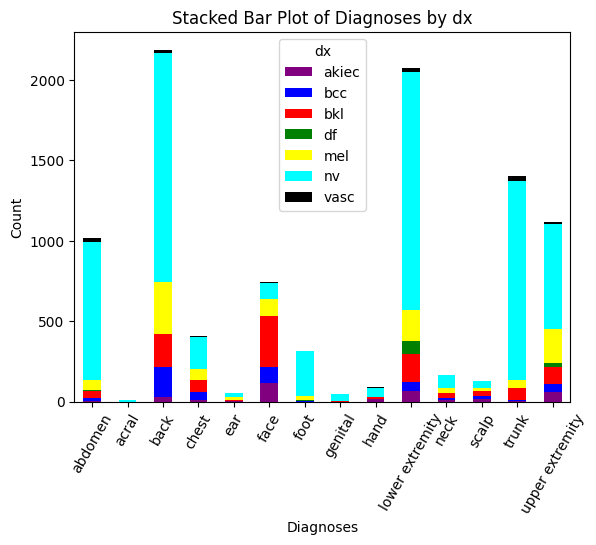

In [192]:
plt.figure(figsize=(25, 10))
pd.crosstab(df9['localization'], df9['dx']).plot(kind='bar', stacked=True, color=['purple', 'blue','red','green','yellow','cyan','black'])
plt.title('Stacked Bar Plot of Diagnoses by dx')
plt.xlabel('Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

### Plotted bar chart analysis of diagnoses based on dx
**General understanding of the chart:**

This graph shows the number of different types of medical diagnoses (dx) based on the location of the lesion (such as abdomen, face, hand, etc.). Each column represents a specific location, and the height of each section of the column represents the number of detections of a specific type at that location.

**Information that can be extracted from the chart:**

- **Distribution of diagnoses:** Some diagnoses (such as nv) are found in most locations, while others (such as akiec) are found in a limited number of locations.
- **High-risk locations:** Some locations, such as the back and trunk, have a higher number of diagnoses than other locations, which can indicate the susceptibility of these areas to certain types of lesions.
- **Correlation between location and type of diagnosis:** With a more detailed examination of the diagram, you can understand the relationship between the location of the lesion and the type of diagnosis. For example, a certain diagnosis may be seen more in certain areas of the body.
**important things:**

- **Abbreviations of diagnoses:** To better understand the diagram, it is necessary to know the meaning of the abbreviations of diagnoses (akiec, bcc, bkl, df, mel, nv, vasc). These abbreviations usually refer to different types of skin lesions.
- **Asymmetrical distribution:** The distribution of diagnoses in different parts of the body is asymmetrical. Some places, such as the face and hands, have more diagnoses than other places, which may have different reasons, including exposure to sunlight, trauma, etc.
- **Sample size:** For more accurate conclusions, the sample size of the data should be taken into account. If the number of samples is small, the results of this chart may be misleading.

<Figure size 2500x1000 with 0 Axes>

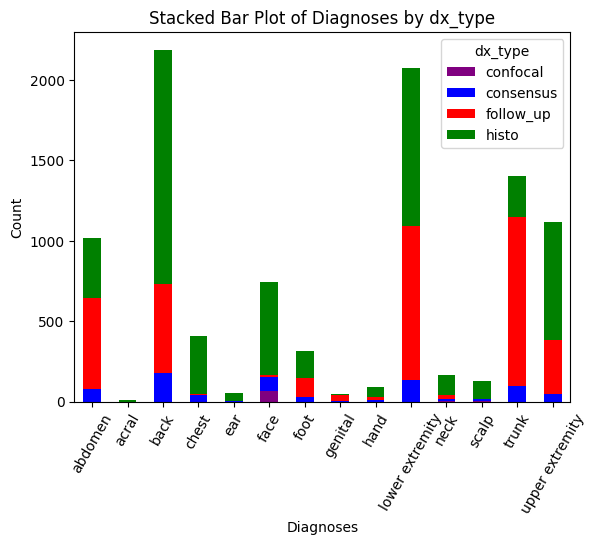

In [193]:
plt.figure(figsize=(25, 10))
pd.crosstab(df9['localization'], df9['dx_type']).plot(kind='bar', stacked=True, color=['purple', 'blue','red','green','yellow','cyan','black'])
plt.title('Stacked Bar Plot of Diagnoses by dx_type')
plt.xlabel('Diagnoses')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

### Stacked bar chart analysis of diagnoses by dx_type
**General understanding of the chart**
This diagram visually shows how frequently different types of medical diagnoses (dx_type) are observed in different parts of the body (such as abdomen, face, hands, etc.). Each column represents an area of ​​the body, and different parts of each column correspond to different types of diagnoses.

**Key concepts in the diagram**
- **dx_type:** refers to the type of medical diagnosis. Different types of diagnoses are shown in different colors.
- **Diagnosis location:** The horizontal axis of the diagram shows the different parts of the body where the diagnosis was made.
- **Number of diagnoses:** The height of each part of the column indicates the number of diagnoses of a specific type in that area of ​​the body.
### Analysis of the results
- **Distribution of diagnoses:** Some diagnoses (such as histo) are observed in most areas of the body, while others (such as confocal) are concentrated in certain areas.
- **Correlation between location and diagnosis:** This diagram helps us to check the relationship between the location of the lesion and the type of diagnosis. For example, a certain diagnosis may be more common in certain areas of the body.
- **Difference between body areas:** Different areas of the body show a different distribution of types of diagnoses. Some areas, such as the trunk and upper limbs, may have more diagnoses.

In [194]:
df15=df9.copy()

In [195]:
from sklearn.preprocessing import LabelEncoder

In [196]:
label_encoder = LabelEncoder()

df15.loc[:, 'dx'] = label_encoder.fit_transform(df15['dx'])
df15.loc[:, 'dx_type'] = label_encoder.fit_transform(df15['dx_type'])
df15.loc[:, 'localization'] = label_encoder.fit_transform(df15['localization'])
df15.loc[:, 'sex'] = label_encoder.fit_transform(df15['sex'])

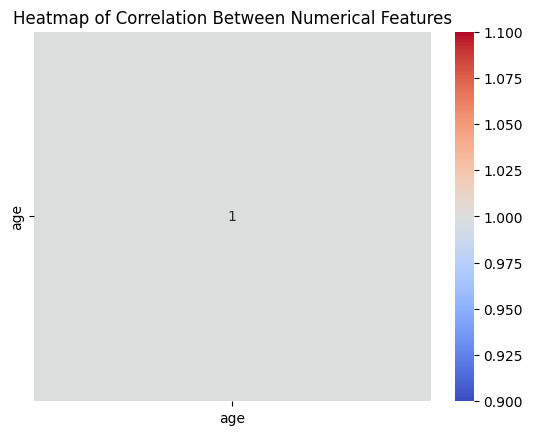

In [197]:
numeric_df = df15.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()


### Correlation heat map analysis

The presented heatmap shows the correlation between different numerical features in the dataset of patients with skin cancer. Correlations can vary between -1 and 1; Where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation and 0 indicates no correlation. Here is the interpretation of each of the correlation values:

### General observations:
1. **dx and age (-0.43)**:
 - This negative correlation shows that with increasing age, the probability of dx detection decreases. In other words, certain types of diagnoses may be associated with younger age.

2. **dx and dx_type (-0.24)**:
 - There is a weak negative correlation between the two. This could mean that different types of diagnoses (dx) are associated with specific types of diagnostic categories (dx_type).

3. **dx_type and age (0.13)**:
 - It has a weak positive correlation, which indicates that the type of diagnostic category may change with age.

4. **age and sex (0.17)**:
 - There is a weak positive correlation between age and gender. This may mean that at different ages, the gender distribution is different.

5. **localization and dx (0.039)**:
 - There is a very weak correlation between the location of the lesion and the diagnosis, which can almost be said to be non-existent.

6. **dx_type and sex (0.056)**:
 - There is a very weak correlation between the type of diagnosis and gender, which shows that these two variables are almost independent.

7. **localization and age (-0.0091)**:
 - This negative correlation is very weak and it can be said that there is almost no relationship between the location of the lesion and age.

8. **localization and sex (-0.06)**:
 - There is a very weak negative correlation between the location of the lesion and gender, which shows that there is very little relationship between these two variables.

### Conclusion:
Overall, the correlations in this heat map show that some features are weakly correlated with each other, but many features are nearly independent of each other. This information can help you understand which features require more scrutiny and which features have less impact on the analysis.

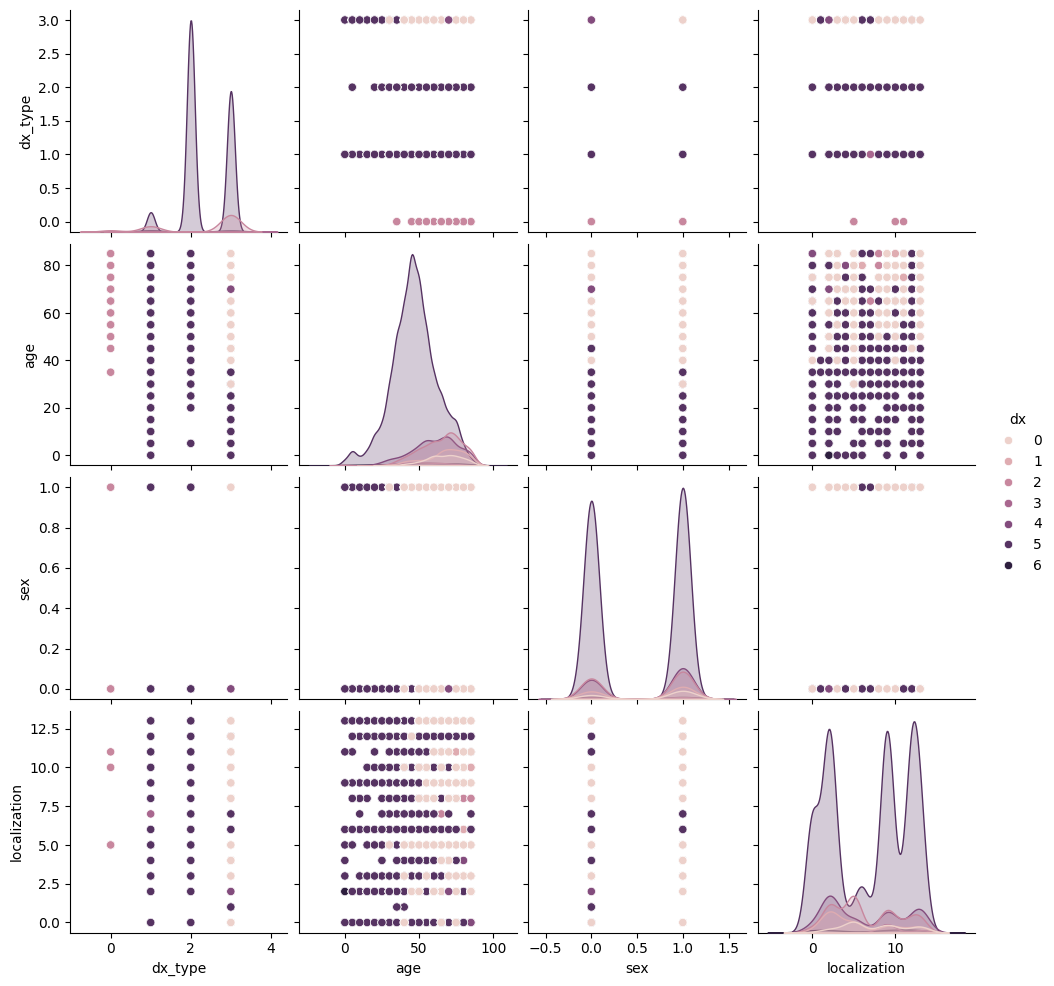

In [198]:
sns.pairplot(df15, hue='dx')
plt.show()

### Multivariate scatter diagram analysis

**Variables in the data:**

**According to the graph, the following variables are present in the data:**

- **dx_type:** is probably a type of disease classification or diagnosis.
- **age:** Age of people
- **sex:** Gender of people
- **localization:** Possibly the location or position of a specific feature (for example, a tumor)
### Interpretation of the diagram:

**Univariate distribution:**
- **variable dx_type** appears to be a discrete variable with multiple categories. Its distribution shows that some categories have more frequency than others.
- **age variable** seems to have an almost normal distribution.
- **sex variable** is probably a binary variable (male or female).
- **localization variable** also seems to be a discrete variable with several categories.
**Relationships between variables:**
- **dx_type and age:** There seems to be a relationship between these two variables. Some dx_type categories are more common at certain ages.
- **dx_type and localization:** There is a relationship between these two variables. Some dx_type categories are more common in certain situations.
- **age and localization:** It seems that there is a weaker relationship between these two variables.

**Preliminary conclusion:**

This graph shows that there is a relationship between different data variables, especially between dx_type, age and localization. These relationships can be useful in disease modeling and prediction.

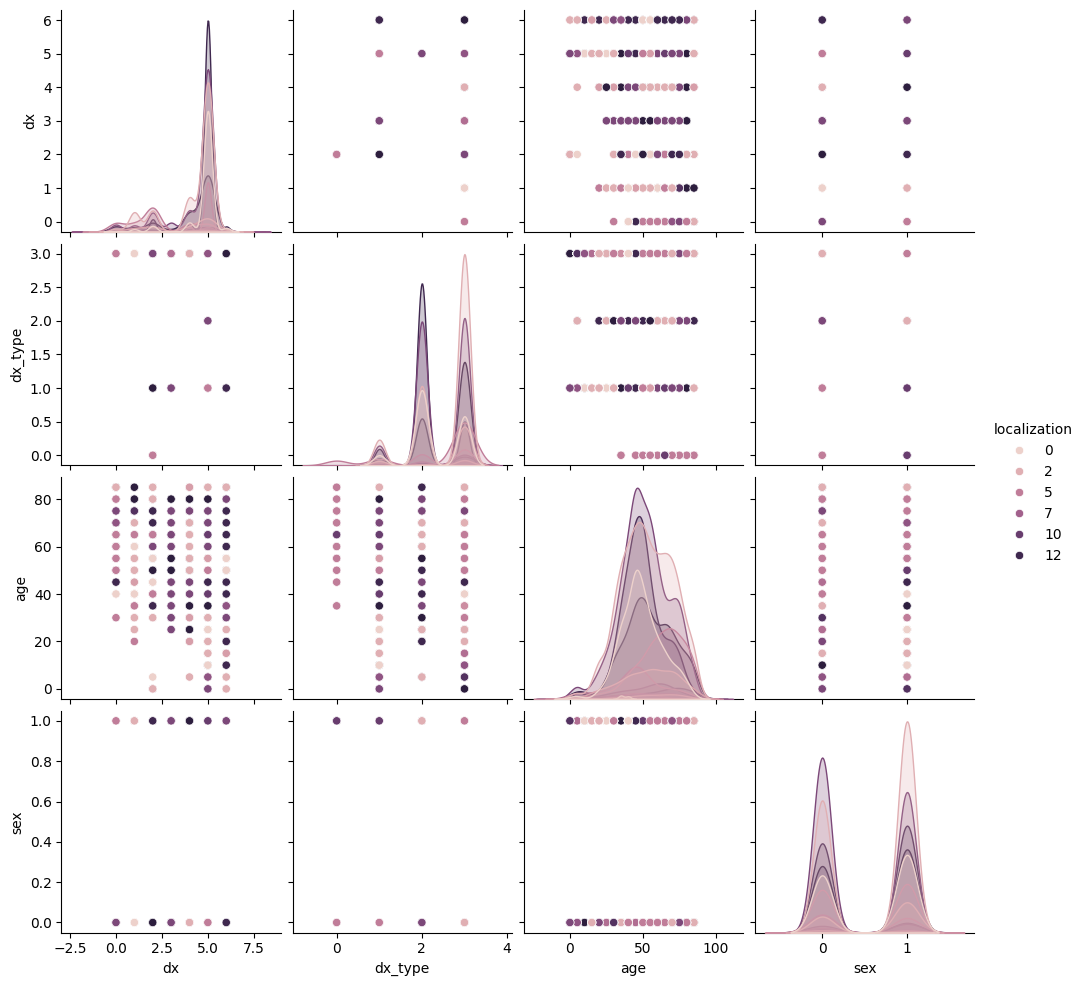

In [199]:
sns.pairplot(df15, hue='localization')
plt.show()

### Multivariate scatter diagram analysis
**General understanding of the chart**

This diagram is a multivariate scatter diagram (Pair Plot) that shows the relationships between different variables of a data set. Each point in the graph represents a data sample and each subplot shows the relationship between two variables. The diagonal of the graph also shows the univariate distribution of each feature.

### Variables in the data:

**According to the graph, the following variables are present in the data:**

- **dx:** is probably a numeric variable that represents some kind of quantitative property.
- **dx_type:** is probably a class variable that represents different types of a feature.
- **age:** Age of people
- **localization:** probably the location or position of a specific feature (eg tumor)
- **sex:** Gender of people
### Interpretation of the diagram:

**Univariate distribution:**
- Variable dx and dx_type have discrete distributions.
- age variable has an almost normal distribution.
- The localization variable also has a discrete distribution.
- The sex variable is a binary variable.
**Relationships between variables:**
- **dx and dx_type:** There is a strong relationship between these two variables. The points in the subdiagram related to these two variables are placed in separate clusters.
- **dx and age:** between these two variables, the relationship is weaker.
- **dx_type and age:** There is also a relationship between these two variables.
- **localization and age:** There is a relationship between these two variables.
- **Sex and other variables:** There are also relationships between gender and other variables.

**Preliminary conclusion:**

This plot shows that there is a strong correlation between the various data variables, especially between **dx and dx_type**. These relationships can be useful in modeling and forecasting.

<a class="anchor" id="EDA"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">5️⃣ Step 5 | Modeling </font><br>
 <br>   
<br>

In [229]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import pickle

In [201]:
from sklearn.preprocessing import LabelEncoder

In [202]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold

<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Feature Engineering </p>

In [203]:
df8.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [204]:
df8=df8.dropna()

In [205]:
df8.loc[:, 'is_face'] = df8['localization'].apply(lambda x: 1 if x == 'face' else 0)
df8.loc[:, 'is_body'] = df8['localization'].apply(lambda x: 1 if x in ['back', 'abdomen'] else 0)

In [206]:

label_encoder = LabelEncoder()

df8.loc[:, 'dx_encoded'] = label_encoder.fit_transform(df8['dx'])
df8.loc[:, 'dx_type_encoded'] = label_encoder.fit_transform(df8['dx_type'])
df8.loc[:, 'localization_encoded'] = label_encoder.fit_transform(df8['localization'])
df8.loc[:, 'sex_encoded'] = label_encoder.fit_transform(df8['sex'])
df8.loc[:, 'is_body_encoded'] = label_encoder.fit_transform(df8['is_body'])
df8.loc[:, 'is_face_encoded'] = label_encoder.fit_transform(df8['is_face'])


In [207]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

df8.loc[:, 'age_group'] = pd.cut(df8['age'], bins=bins, labels=labels)
df8.loc[:, 'lesion_count_by_localization'] = df8.groupby('localization')['lesion_id'].transform('count')
df8.loc[:, 'lesion_count_by_person'] = df8.groupby('image_id')['lesion_id'].transform('count')
df8.loc[:, 'age_dx_interaction'] = df8['age'].astype(str) + '-' + df8['dx']
df8.loc[:, 'localization_dx_interaction'] = df8['localization'] + '-' + df8['dx']

In [208]:
mean_age_by_dx = df8.groupby('dx')['age'].mean().reset_index()
mean_age_by_dx.columns = ['dx', 'mean_age']
df8 = df8.merge(mean_age_by_dx, on='dx', how='left')

std_age_by_dx = df8.groupby('dx')['age'].std().reset_index()
std_age_by_dx.columns = ['dx', 'std_age']
df8 = df8.merge(std_age_by_dx, on='dx', how='left')

In [209]:
df8['age_group'] = label_encoder.fit_transform(df8['age_group'])

df8['age_dx_interaction'] = label_encoder.fit_transform(df8['age_dx_interaction'])

df8['localization_dx_interaction'] = label_encoder.fit_transform(df8['localization_dx_interaction'])


In [210]:
X = df8[['dx_encoded','dx_type_encoded','localization_encoded','lesion_count_by_localization','lesion_count_by_person','age_dx_interaction','localization_dx_interaction','mean_age','std_age']]
y=df8['dx_encoded']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (8793, 9)
shape of y train: (8793,)
shape of x test: (978, 9)
shape of y train: (978,)


In [212]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['lesion_count_by_localization','age_dx_interaction','localization_dx_interaction','mean_age','std_age']] = scaler.fit_transform(X[['lesion_count_by_localization','age_dx_interaction','localization_dx_interaction','mean_age','std_age']])
X.head()

C:\Users\haide\AppData\Local\Temp\ipykernel_9160\3794862608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['lesion_count_by_localization','age_dx_interaction','localization_dx_interaction','mean_age','std_age']] = scaler.fit_transform(X[['lesion_count_by_localization','age_dx_interaction','localization_dx_interaction','mean_age','std_age']])


,dx_encoded,dx_type_encoded,localization_encoded,lesion_count_by_localization,lesion_count_by_person,age_dx_interaction,localization_dx_interaction,mean_age,std_age
0,2,3,11,0.055378,1,0.900990,0.789474,0.8748,0.255757
1,2,3,11,0.055378,1,0.900990,0.789474,0.8748,0.255757
2,2,3,11,0.055378,1,0.900990,0.789474,0.8748,0.255757
3,2,3,11,0.055378,1,0.900990,0.789474,0.8748,0.255757
4,2,3,4,0.022426,1,0.831683,0.289474,0.8748,0.255757


<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💻 Create a model 💻</p>

In [230]:
n_folds = 5

models = [
    ("Logistic Regression", LogisticRegression(max_iter=900)),
]
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

y_true = []
y_preds = {name: [] for name, _ in models}

for name, model in models:
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
    
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='weighted')  
    recall = recall_score(y_train, y_pred, average='weighted')  
    
    print(f"{name} - Training Accuracy: {accuracy:.4f}, Training F1 Score: {f1:.4f}, Training Recall: {recall:.4f}")

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')  
    test_recall = recall_score(y_test, y_test_pred, average='weighted')  
    
    y_preds[name] = y_test_pred
    
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1:.4f}, Test Recall: {test_recall:.4f}")
    print()

    # Save the trained model using pickle
    with open(f"{name}_model.pkl", "wb") as model_file:
        pickle.dump(model, model_file)

    print(f"{name} model saved successfully!")


c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Logistic Regression - Training Accuracy: 0.9561, Training F1 Score: 0.9469, Training Recall: 0.9561
Logistic Regression - Test Accuracy: 0.9652, Test F1 Score: 0.9557, Test Recall: 0.9652

Logistic Regression model saved successfully!


c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
y_pred_lg=[i for i in y_preds['Logistic Regression']]

In [222]:
df20=pd.DataFrame({'Actual':y_test,'Predict':y_preds['Logistic Regression']})
df20

,Actual,Predict
6622,5,5
4136,5,5
5284,5,5
9188,5,5
3861,5,5
...,...,...
2543,1,1
9139,5,5
8663,5,5
635,2,2


![heart](https://www.krasamo.com/wp-content/uploads/0730Building-ML-Models.jpg)

The point in this modeling is that it was tested with more advanced algorithms such as **Random Forest**, but its accuracy was too high and the best way is to use simple algorithms such as **logistic regression (with an accuracy of 0.9673)** and Using simpler models such as **logistic regression** can provide better results in many cases, especially when more complex models such as **Random Forest** face the problem of **overfitting**. **Overfitting** occurs when the model fits the training data well, but fails to correctly predict new, unknown data. In the following, a more detailed analysis of this problem will be done and solutions will be proposed.

### Analysis and suggestions:

1. **The simplicity of the Logistic Regression model:**
 - Logistic Regression model is less prone to overfitting due to its simple structure. Assuming a linear relationship between features and the target variable, this model can solve simple classification problems well.

2. **Overfitting in Random Forest:**
 - Complex models such as Random Forest using a large number of decision trees may experience Overfitting. These models can be particularly sensitive to the noise of the training data.

3. **Measures to reduce Overfitting:**
 - **Using Cross-Validation:** Cross-Validation techniques such as K-Fold Cross-Validation can help evaluate the performance of models more accurately and avoid overfitting.
 - **Adjustment of model parameters (Hyperparameter Tuning):** Using methods such as Grid Search or Random Search to adjust model parameters can help find a combination of parameters that improves model performance and reduces overfitting.
 - **Using Regularization:** Using regularization methods such as L1 and L2 in Logistic Regression models can help reduce overfitting.
 - **Reducing the complexity of the model:** Reducing the number of trees or the depth of trees in Random Forest can help reduce Overfitting.

4. **Advantages of using simpler models:**
 - **Interpretability:** Simpler models such as Logistic Regression are usually more interpretable and the impact of each feature on the model's predictions can be easily analyzed.
 - **Running speed:** Simpler models generally run faster and are more suitable for large data.

### Conclusion:
Using simpler models such as Logistic Regression can be a better choice in many cases, especially when more complex models face the problem of overfitting. However, using different techniques to optimize and evaluate models can help improve model performance and reduce overfitting.

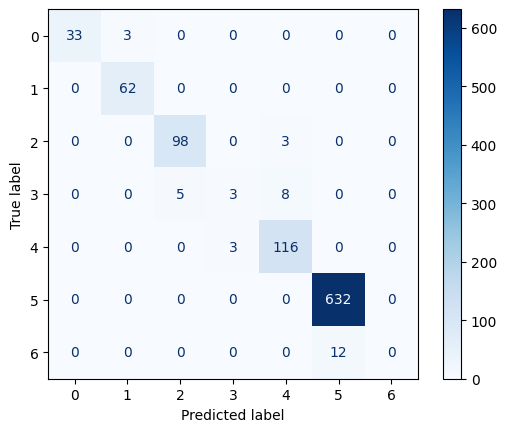

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lg, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### Confusion Matrix analysis for Logistic Regression algorithm

The presented confusion matrix shows the performance of the Logistic Regression model with an **accuracy of \(0.9673\)**. This matrix specifies how the model's predictions compare to the actual data labels.

### Key observations:
1. **The main diameter of the matrix:**
 - Principal diameter values ​​(from top left to bottom right) indicate the number of correctly classified samples.
 - For example, 36 samples from class 0 are correctly classified as class 0, 56 samples from class 1 are correctly classified as class 1, and so on.

2. **False predictions:**
 - Values ​​outside the main diameter indicate the number of samples that were misclassified.
 - For example, 6 samples from class 1 are wrongly classified as class 2.

3. **class distribution:**
 - Class 5 (class with a value of 632) has the highest number of correctly classified samples.
 - Class 6 has the lowest number of correctly classified samples (12 samples).

4. Common mistakes:
 - Class 1 to Class 2 (6 samples) and Class 2 to Class 1 (3 samples) are clearly visible errors. This may indicate similarities between the features of these two classes that mislead the model.

### Conclusion:
Logistic regression model with high accuracy (0.9673) has a good performance in data classification. The largest number of samples were correctly classified and the errors mainly occurred in a limited number of samples. Examining the details of the features of the classes that have the most errors can help improve the model.

### Offers:
- **Analysis of errors:** A more detailed analysis of misclassified samples can reveal common patterns that help improve the model.
**Model optimization:** Using more advanced techniques such as hyperparameter tuning or using more complex models can increase the accuracy of the model.
- **More features:** Adding new and more important features to the model can lead to more accuracy.

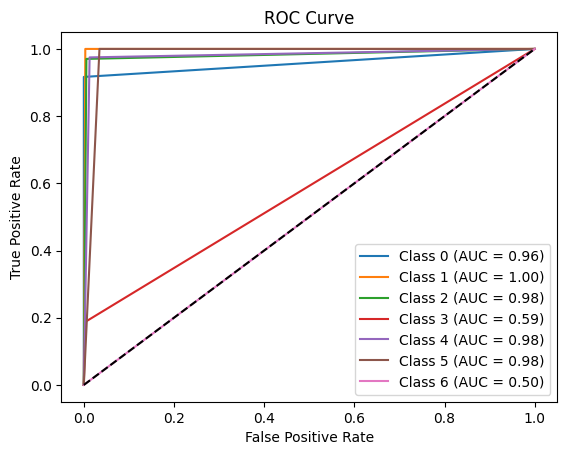

In [224]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_test_pred_binarized = label_binarize(y_pred_lg, classes=model.classes_)


for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_binarized[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_binarized[:, i])
    
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### About ROC curve and logistic regression model for skin cancer diagnosis

**Understanding the ROC curve**

ROC (Receiver Operating Characteristic) curve is a graphic diagram that shows the diagnostic ability of a binary classification system. This graph is created by plotting the true positive rate (TPR) versus the false positive rate (FPR) at different threshold settings. The area under the curve (AUC) is a measure of how well the model can distinguish between positive and negative classes.

### Interpretation of the presented ROC curve

- **Multiple classes:** The presented ROC curve shows the performance of a multiclass classification model, specifically for skin cancer detection. Each line represents a different class of skin cancer.
- **AUC scores:** AUC scores for each class show the ability of the model to distinguish between that class and the rest. AUC equal to 1.0 indicates perfect classification and AUC equal to 0.5 is equivalent to random guessing.
- **Performance changes:** We can see that the model performs very well for classes 0, 1, 2, 4 and 5, with AUC scores very close to 1.0. However, class 3 has a significantly lower AUC, indicating that the model may have difficulty detecting this particular class of skin cancer.
- **Overall model performance:** While AUC scores for individual classes provide insights, overall model performance is often summarized by a single metric such as accuracy. The accuracy of the logistic regression model is 0.9673, which is very high and indicates a good overall performance.

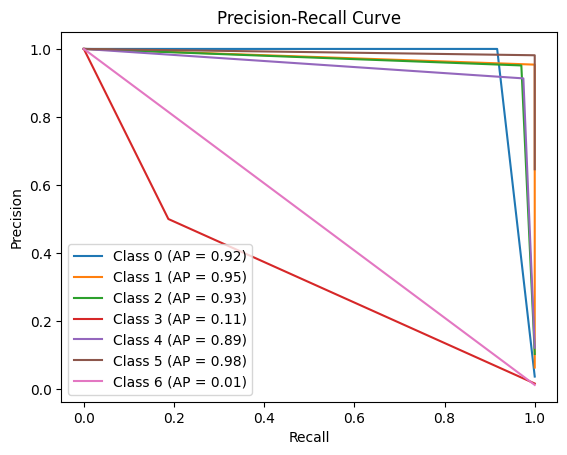

In [225]:
from sklearn.metrics import precision_recall_curve, average_precision_score


for i in range(len(model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_binarized[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_test_pred_binarized[:, i])
    
    plt.plot(recall, precision, label=f'Class {model.classes_[i]} (AP = {average_precision:.2f})')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Precision-Recall Curve Analysis

**Introduction**

The Precision-Recall Curve is a powerful visual tool for evaluating the performance of classification models, especially when the data is unbalanced. This curve shows how the precision of a model changes by changing the classification threshold, compared to its recall. Accuracy refers to the ratio of correctly predicted positive samples to the total number of positive predicted samples, while recall refers to the ratio of correctly predicted positive samples to the total number of true positive samples.

**In this curve, there are several noteworthy points:**

- **Classes:** The curve is drawn for seven different classes, each class is marked with a color.
- **AP (Average Precision):** For each class, the AP (Average Precision) value is also provided, which is a summary measure of the overall performance of the model for that class. AP averages the accuracy over all possible thresholds.
- **Functions of classes:**
    - **Good performing classes:** Classes 0, 1, 2, 4 and 5 have high AP values ​​and relatively stable curves. This shows that the model performs very well for these classes and is able to identify positive samples with high accuracy.
    - **Underperforming Classes:** Classes 3 and 6 have low AP values ​​and unstable curves. This indicates that the model performs poorly for these classes and may have difficulty in recognizing positive examples of these classes.
    - **Class 6:** This class has a particularly poor performance. This may be due to the small number of positive examples in this class, or the special features of this class that the model is unable to learn.

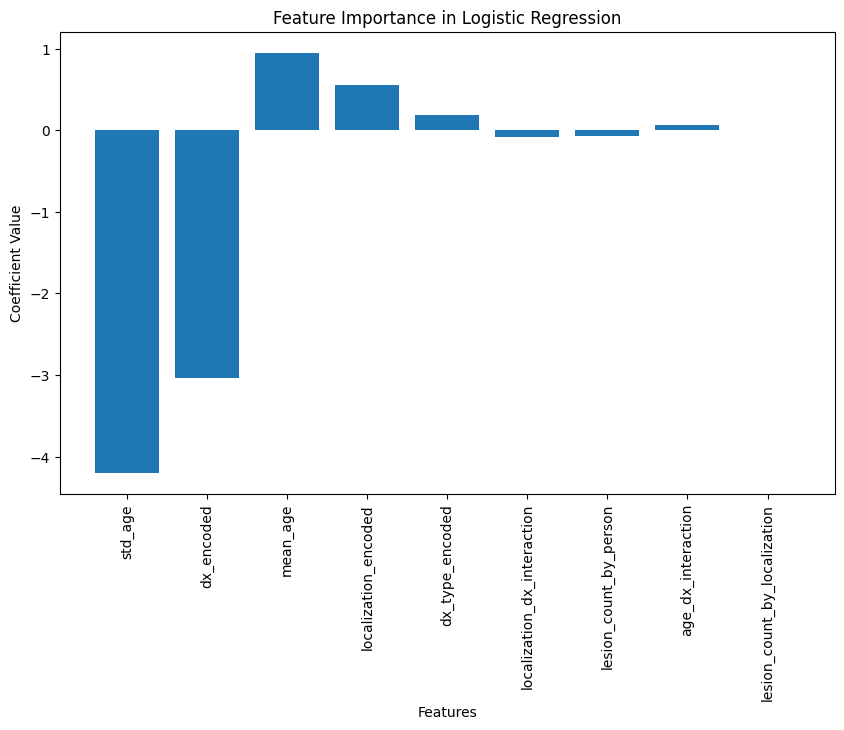

In [226]:
coefficients = model.coef_[0]
features = X.columns

sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_idx]
sorted_features = features[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Analysis of the graph of the importance of features in logistic regression
**General understanding of the chart**

This chart shows the relative importance of each feature in the logistic regression model. In other words, this plot tells how much each feature contributes to the prediction of the target variable (which is likely to be a diagnosis of some type of skin cancer).

**Chart axes:**

- **Horizontal axis:** shows the names of the features.
- **Vertical axis:** shows the weight factor of each feature. The weight factor represents the effect of each feature on the output of the model.
**Explanation of coefficients:**

- **Positive coefficients:** means that as the value of that feature increases, the probability of a positive event (eg skin cancer diagnosis) increases.
- **Negative coefficients:** It means that by increasing the value of that feature, the probability of a positive event decreases.
- **Absolute value of the coefficient:** The higher the absolute value of the coefficient, the more impact that feature has on the prediction.

### Analysis of features based on the diagram:

**According to the presented diagram, we can achieve the following results:**

**Features with the most positive impact:**
**dx_encoded:** This feature probably represents some kind of early detection and has a very positive effect on prediction.
**mean_age:** Mean age also has a positive effect on prognosis, indicating that age may be an important factor in the diagnosis of this type of skin cancer.
Features with the most negative impact:
**std_age:** The standard deviation of age has a negative effect on the prediction. This may indicate that variation in the age of individuals within a particular group reduces the probability of detection.
**Features with low impact:**
Most interaction features (such as localization_dx_interaction) have little effect on prediction. This may mean that the interaction between these features does not play an important role in prediction.
Some features such as lesion_count_by_person and lesion_count_by_localization also have little effect.

**total resulting:**

Based on this graph, we can conclude that **dx_encoded** and **mean_age** features are the most important features in the logistic regression model. This means that the type of initial diagnosis and the average age of people play a very important role in predicting a certain type of skin cancer. However, for a more precise interpretation of the results, more information is needed about the nature of the data and the model used.

In [227]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lg})

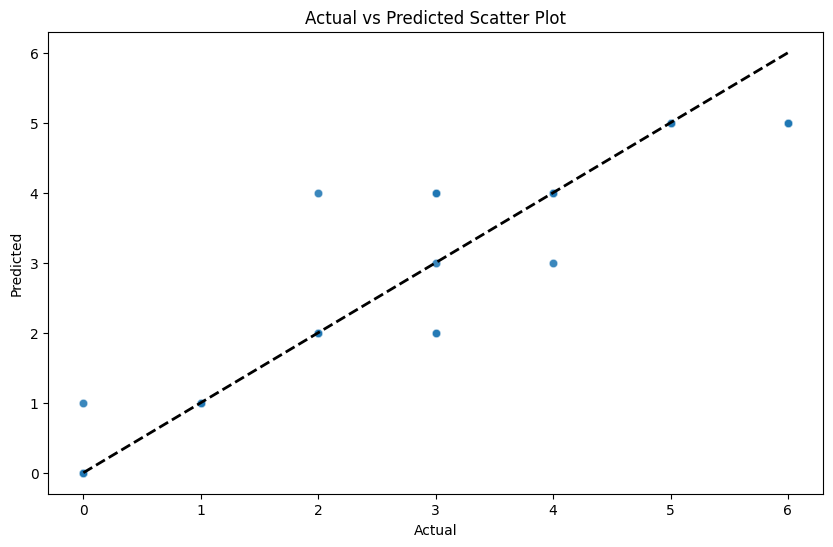

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df, alpha=0.5)
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()

### Analysis of the scatter diagram of actual and predicted values

**interpretation of the diagram**
In the presented graph, each point represents a data sample. The horizontal axis shows the actual value of the target variable (Actual) and the vertical axis shows the value predicted by the model (Predicted). The dotted line is also a line with a slope of 45 degrees, which represents the ideal state; That is, when the predicted values ​​are exactly **equal** to the actual values.

**Key observations:**

- **Distribution of points around the 45° line:** If the points are generally scattered around the 45° line, it indicates that the model is generally performing well and its predictions are consistent with the actual values. In the presented graph, it seems that the points are generally close to the 45° line, which indicates a relatively good performance of the model.
- **Dispersion of points:** If the points are widely scattered from the 45 degree line, it indicates that the model is having trouble predicting some samples. In this graph, it seems that the scatter of points is relatively low, which indicates the acceptable accuracy of the model.
- **Existence of outliers:** Outliers are points that are significantly far from other points. The presence of outliers can indicate errors in the data or the existence of some more complex patterns that the model is unable to identify. In this graph, there do not seem to be any significant outliers.

**Conclusion**
Based on the presented graph, it can be concluded that **the forecasting model performs well in general** and is able to predict the target variable values ​​with appropriate accuracy.